# Introduction

A credit card is a convinient tool that allows you to buy items now and pay for them later. Credit card is a physical payment card that allows you to get credit from a financial institution. If you buy something with credit, you are in debt. This means you owe money to the company that gave you the credit card. If you don't pay the entire amount at the end of each month, you pay a fee for the credit card called interest. .If managed correctly, credit cards can be great way to build credit and manage your money.

## Importance in Today's world:

Credit score cards are a common risk control method in the financial history. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. Credit score is a number that depicts a consumer's credit worthiness.

## Importance of Predicting a good client:

Credit risk as the board in banks basically centers around deciding the the probability of customer's default or credit decay and how expensice it will end up being assuming it happens. It is important to consider major factors and predict beforehand the probability of consumers defaulting given their conditions, which is where a machine learning model comes in handy and allows the bank and major finantial institutions to predict whether the customer will defaul or not. This project builds a machine learning model with the best accuracy possible.

## Impact on Banking Sector:

Banks receive a lot of credit card applications. Many of the applications do not get approved for a variety of reasons, like increased loan balances or poor-income levels. Manually analysing these applications can be very time consuming and full of human errors. Hence we can automate this task with the help of machine learning.

### 0.import the necessary packages

In [11]:
#### importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import missingno as msno
from scipy import stats
from datetime import datetime, timedelta
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
### 1. Get the data

#### 1.1 import csv file

In [12]:
# Load the datasets
credit_card_df = pd.read_csv("Credit_card[1].csv")
credit_card_label_df=pd.read_csv("Credit_card_label[1].csv")

In [13]:
# Merge the datasets based on the common identifier
credit_card_merged_data_df = pd.merge(credit_card_df, credit_card_label_df, on="Ind_ID", how="inner")

# Verify the merged dataset
print(credit_card_merged_data_df.head())

#shape of full data
credit_card_merged_data_df.shape

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

(1548, 19)

## **Hypotheses**:

Hypothesis 1: Annual income will have a positive correlation with credit card approval. Higher income individuals are more likely to be approved for credit cards.

Hypothesis 2: Employment status will be an important feature in credit card approval. Employed individuals may have a higher chance of approval compared to unemployed or self-employed individuals.

Hypothesis 3: Education level will play a role in credit card approval. Higher education levels may be associated with a higher likelihood of approval.

Hypothesis 4: Marital status could influence credit card approval. Married individuals may have a higher chance of approval compared to single individuals.

Hypothesis 5: Age might be a significant factor in credit card approval. Younger individuals may have a lower chance of approval compared to older individuals due to limited credit history.

These hypotheses provide a starting point for exploring the relationships between features and credit card approval. Through data analysis and machine learning modeling, we can test these hypotheses and identify the most influential factors for predicting credit card approval.

To compare and justify our model against other possible models, we will evaluate the performance of multiple machine learning algorithms using relevant cost functions such as accuracy, precision, recall,
 and F1-score.

### 1.2 creating the target variable

In [14]:
# Select the target variable
target_variable = credit_card_merged_data_df['label']

# Verify the extracted target variable
print(target_variable)

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64


### 1.3 Rename features

In [15]:
# rename the features to a more readable feature names
credit_card_merged_data_df = credit_card_merged_data_df.rename(columns={
    'GENDER':'Gender',
    'Car_Owner':'Has a car',
    'Propert_Owner':'Has a property',
    'CHILDREN':'Children count',
    'Annual_income':'Income',
    'Type_Income':'Employment status',
    'EDUCATION':'Education level',
    'Marital_status':'Marital status',
    'Housing_type':'Dwelling',
    'Birthday_count':'Age',
    'Employed_days': 'Employment length',
    'Mobile_phone': 'Has a mobile phone',
    'Work_Phone': 'Has a work phone',
    'Phone': 'Has a phone',
    'EMAIL_ID': 'Has an email',
    'Type_Occupation': 'Job title',
    'Family_Members': 'Family member count',
    'label' : 'Is high risk'
    })

#### What approach are you going to take in order to prove or disprove your hypothesis?**
Data Analysis Approac**h:
Conduct exploratory data analysis (EDA) to understand the distribution, summary statistics, and relationships between variables. Perform statistical tests, such as correlation analysis, t-tests, chi-square tests, or ANOVA, to validate the hypotheses and identify significant associations. Split the data into training and testing sets for model development and evaluation.#### 

What feature engineering techniques will be relevant to your proje- ct?
Feature Engineering Techniqu- es:

Handle missing  values: Impute missing values using appropriate methods such as mean imputation, median imputation, or advanced imputation techniques like K-nearest neighbors (KNN) or regression imputa- tion.

Encode categorical  variables: Convert categorical variables into numerical representations using techniques like one-hot encoding or label en- coding.

Scaling or no rmalization: Scale numerical features to ensure they are on a similar scale, such as using techniques like standardization-  or min-m

Featur e selection: Identify the most relevant features that contribute significantly to credit card approval using techniques like feature importance, correlation analysis, or stepwise selection.

Please justify your data analysis approach.
Justification of Data Analysis Approach:
EDA allows us to gain insights into the data, identify patterns, and explore the relationships between variables. Statistical tests help validate the hypotheses and determine the significance of the associations. Splitting the data into training and testing sets ensures the model's performance is evaluated on unseen data, providing a reliable measure of its effectiveness. Feature engineering techniques enhance the quality of the data by handling missing values, encoding categorical variables, and optimizing the feature set for modeling.ax scaling.

### 2. Explore the Data

#### 2.1 Quick glance at the data

In [16]:
credit_card_merged_data_df.head(5)

,Ind_ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [17]:
credit_card_merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ind_ID               1548 non-null   int64  
 1   Gender               1541 non-null   object 
 2   Has a car            1548 non-null   object 
 3   Has a property       1548 non-null   object 
 4   Children count       1548 non-null   int64  
 5   Income               1525 non-null   float64
 6   Employment status    1548 non-null   object 
 7   Education level      1548 non-null   object 
 8   Marital status       1548 non-null   object 
 9   Dwelling             1548 non-null   object 
 10  Age                  1526 non-null   float64
 11  Employment length    1548 non-null   int64  
 12  Has a mobile phone   1548 non-null   int64  
 13  Has a work phone     1548 non-null   int64  
 14  Has a phone          1548 non-null   int64  
 15  Has an email         1548 non-null   i

### Statistical summary of the dataset

In [18]:
credit_card_merged_data_df.describe()

,Ind_ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Is high risk
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


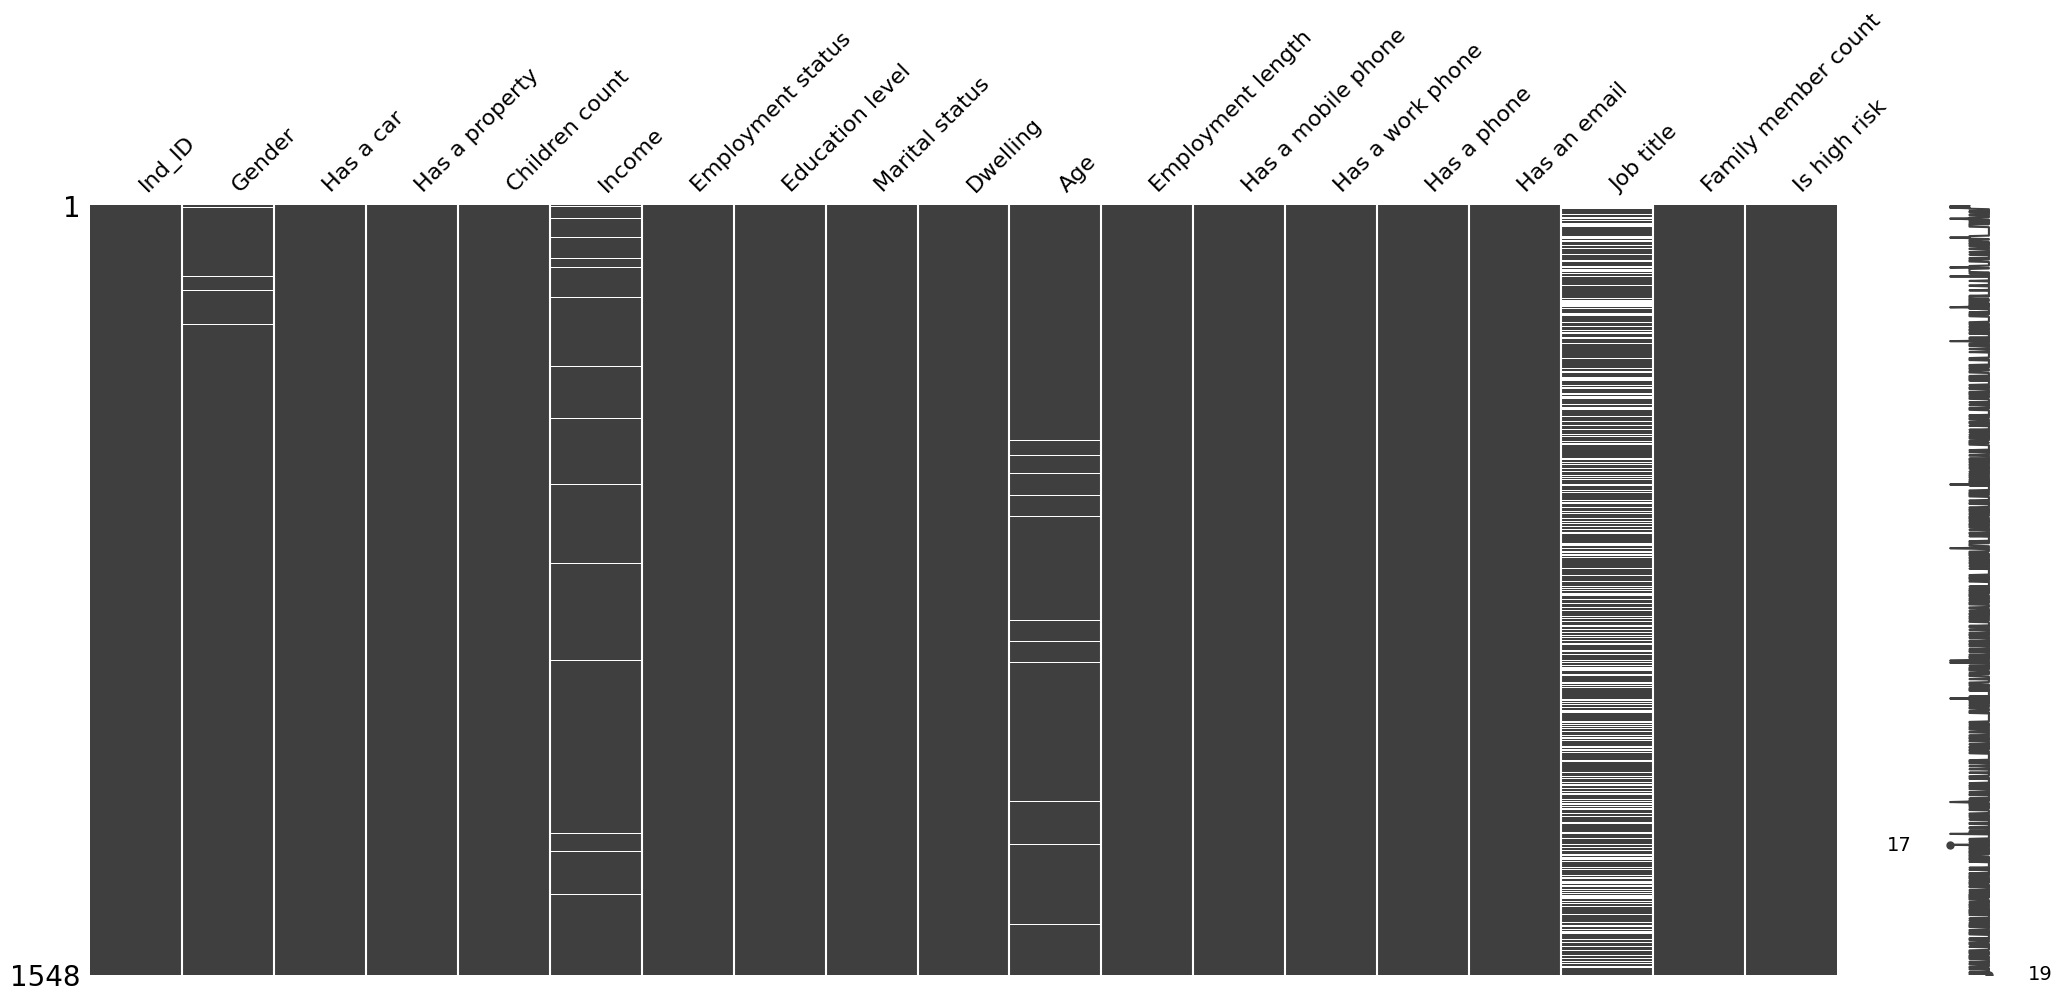

In [19]:
msno.matrix(credit_card_merged_data_df)
plt.show()

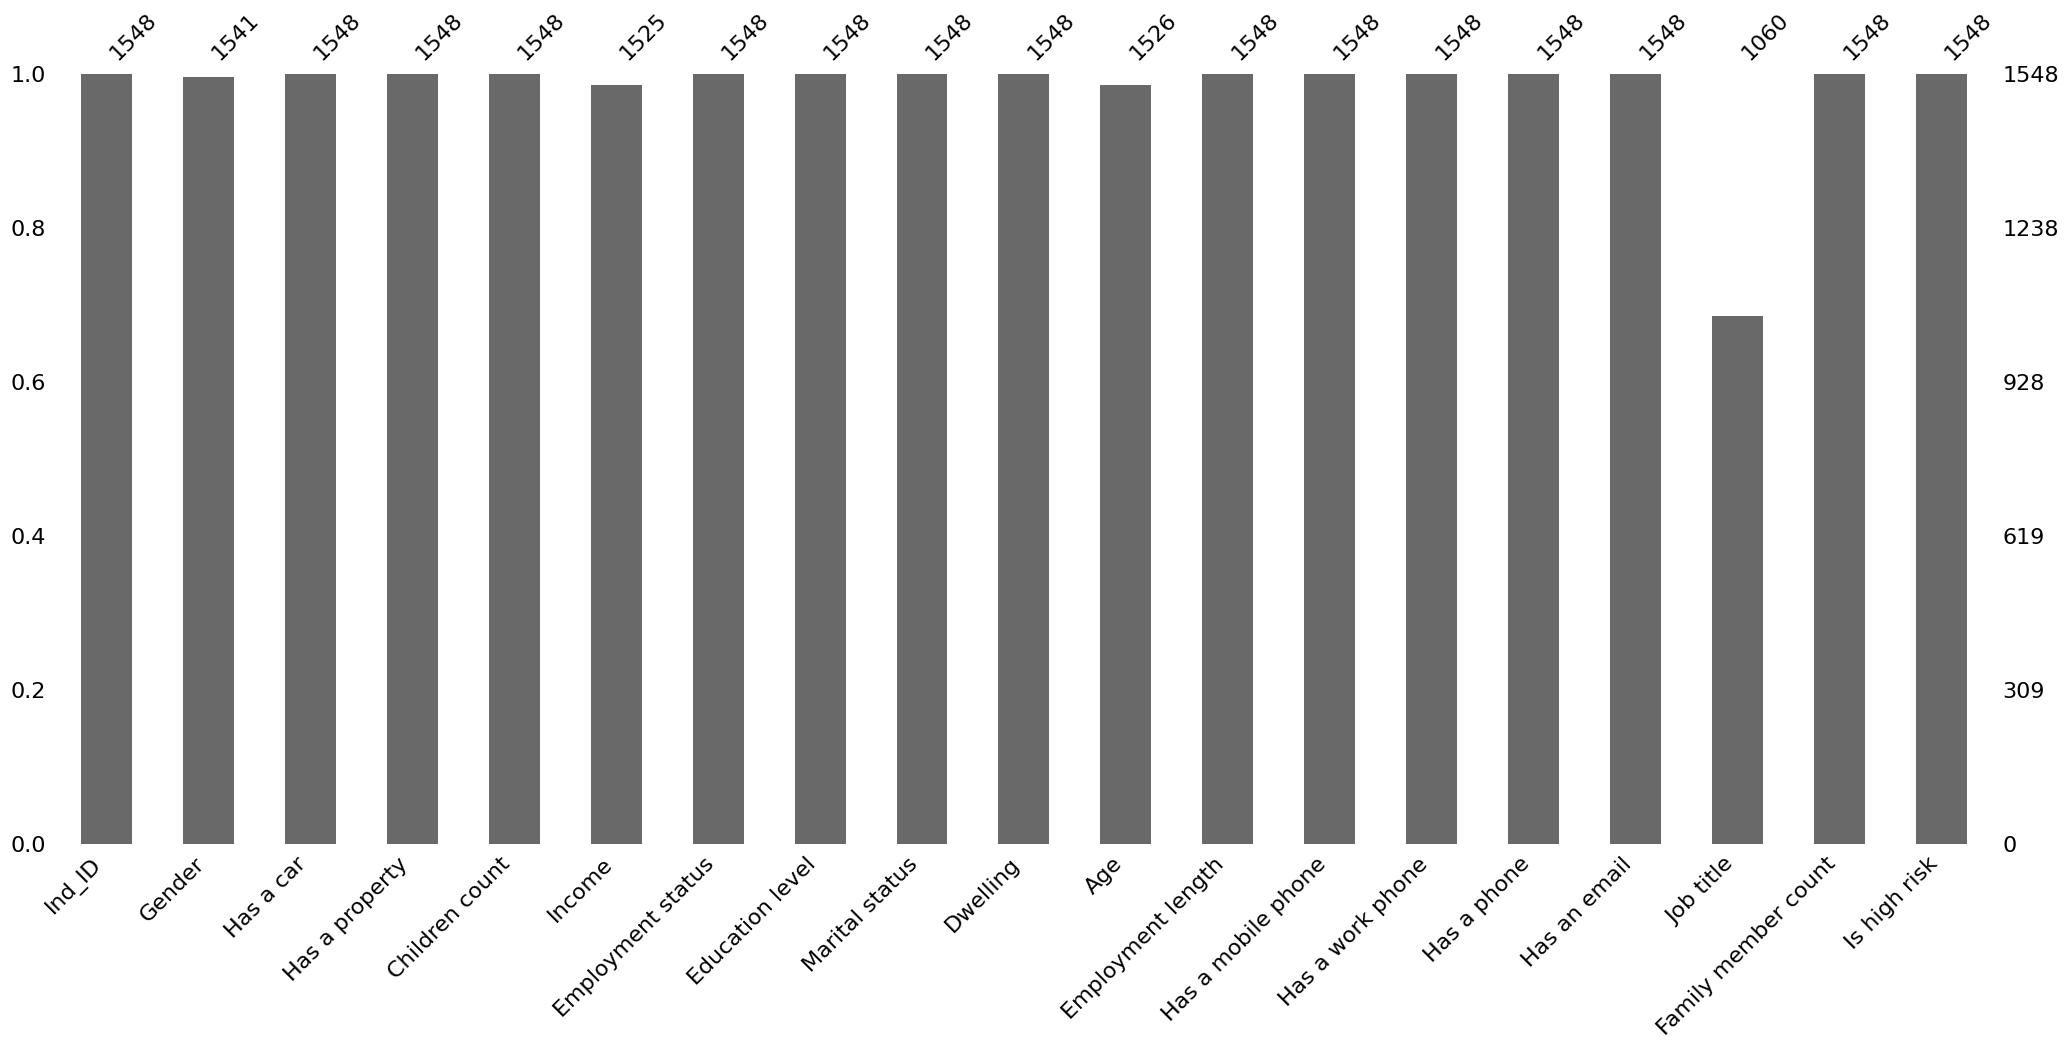

In [20]:
msno.bar(credit_card_merged_data_df)
plt.show()

### 2.2 Functions used to explore each feature

In [21]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [22]:
credit_card_merged_data_df.nunique()
     

Ind_ID                 1548
Gender                    2
Has a car                 2
Has a property            2
Children count            6
Income                  115
Employment status         4
Education level           5
Marital status            5
Dwelling                  6
Age                    1270
Employment length       956
Has a mobile phone        1
Has a work phone          2
Has a phone               2
Has an email              2
Job title                18
Family member count       7
Is high risk              2
dtype: int64

In [34]:
credit_card_merged_data_df.isnull().sum()

Ind_ID                   0
Gender                   0
Has a car                0
Has a property           0
Children count           0
Income                   0
Employment status        0
Education level          0
Marital status           0
Dwelling                 0
Age                     22
Employment length        0
Has a mobile phone       0
Has a work phone         0
Has a phone              0
Has an email             0
Job title              488
Family member count      0
Is high risk             0
dtype: int64

In [35]:
credit_card_merged_data_df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [36]:
credit_card_merged_data_df[credit_card_merged_data_df['Gender'] == 'M'].count()

Ind_ID                 568
Gender                 568
Has a car              568
Has a property         568
Children count         568
Income                 568
Employment status      568
Education level        568
Marital status         568
Dwelling               568
Age                    558
Employment length      568
Has a mobile phone     568
Has a work phone       568
Has a phone            568
Has an email           568
Job title              438
Family member count    568
Is high risk           568
dtype: int64

In [37]:
credit_card_merged_data_df[credit_card_merged_data_df['Gender'] == 'F'].count()

Ind_ID                 980
Gender                 980
Has a car              980
Has a property         980
Children count         980
Income                 980
Employment status      980
Education level        980
Marital status         980
Dwelling               980
Age                    968
Employment length      980
Has a mobile phone     980
Has a work phone       980
Has a phone            980
Has an email           980
Job title              622
Family member count    980
Is high risk           980
dtype: int64

#### The mode here in gender is females. So we can change the null values to the mode value.
     

In [38]:
credit_card_merged_data_df['Gender']=credit_card_merged_data_df['Gender'].fillna('F')

In [39]:
credit_card_merged_data_df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [40]:
credit_card_merged_data_df['Income'].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

In [41]:
credit_card_merged_data_df['Income'].mean()

191399.32622950824

In [43]:
credit_card_merged_data_df['Income']=credit_card_merged_data_df['Income'].fillna(credit_card_merged_data_df['Income'].mean()) 

In [44]:
credit_card_merged_data_df['Income'].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

In [45]:
credit_card_merged_data_df['Age'].unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [46]:
credit_card_merged_data_df['Age']=credit_card_merged_data_df['Age'].fillna(credit_card_merged_data_df['Age'].mean()) 

In [47]:
credit_card_merged_data_df['Age'].unique()

array([-18772.        , -13557.        , -16040.34207077, ...,
       -10229.        , -15292.        , -16601.        ])

In [48]:
credit_card_merged_data_df['Job title'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [49]:
credit_card_merged_data_df['Job title'].mode()

0    Laborers
Name: Job title, dtype: object

In [50]:
credit_card_merged_data_df['Job title']=credit_card_merged_data_df['Job title'].fillna('Laborers') 

In [51]:
credit_card_merged_data_df['Job title'].unique()

array(['Laborers', 'Core staff', 'Cooking staff', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [52]:
credit_card_merged_data_df.isnull().sum()

Ind_ID                 0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Is high risk           0
dtype: int64

In [54]:
credit_card_merged_data_df.fillna(credit_card_merged_data_df.mean(), inplace=True)

TypeError: Could not convert ['YYYYYYYNYYYYYYNNNNNNNYNNNYNNNNNNNYNYYYYYYNNNNNNYYNNNYYNNYYYYNNNNNNNNNNNNNNNNNYNYYYYYYNNNNYYYYYNNYYYNNNNNNYNYNNNYNNNNNNNYYNNNNNYNNNNNNNNNNNYYNYNNNNNNNYNNYYYYYNNNNNNYNNNYYYYYYNNNYNNNNNNNNYNNYYNNNNNNNYYNNNNNNYYYYNNYYNYNNNNYNNYNYNYYYNYYYYNNYNYNYYNNYYNNYNNYNNNNYNYNYYNNYYNNYNYNNNYNNNYNNYNNNYNNYNNYNNNNYNNYNNNNNYYNNYNNNNNYNNYYYYNNYNYNNNYNYNNNNYNYNNYNNNNYNNYYNYYYNNNNNYNNNYYYNNNYNNYNYYYNYNYNYYYNYYYNNNNYYYNNYNNNYYYNYYNYYYYNYNYNYNNNNYNNNYYNYYYYNYYNNNNYYYYYYYYNNYNNNYYNNNYNNNNNNYNNNYYNNNNYYNNNYNYNNNYNNNNYYNYNNNYNNNNYNNNNNNYNNNNNNNYNNNYNNYNYNYYYNYYYNYNYYYNYYYYYNNYYNNYNNNNNNYNNYYNYYNYNYYYYYNNNYNNYYYYNNYYNNYYYYYNNYYYNYNNYYNNNNYNNNYYNNNNNNNNNNNNNNNYNYNYNNYNYNNNNNNYNYYNYNYNYYNNNNYNNYNYYNYYYNNNYYNYYYNYNNNNNYNNNYNNNNYNNYNYNYYYNYYNNNYYNNNNYYNNYNYNNYYNYNNNNYNYNNYYNYNYYYYNNNYYYNNNYNNYNYNNNNYNNNNYYNNNNNNYYYYNYYNYNYYNYNYNYYNYYYNNNNNNNYYYNYNNNNYNNNNYNNYNYYNYYYNYNNNNYNYNNNNYNYNYYNNNYYNYNYNNNNNNNNNYYYYNNYYNYNNNYNNNNNYYYNNNYNYNNNYNNYYYNNNNNNNNYYNNNYNNNYYYYNYYNNYYNNYNYNNNNNNYNNNYYNNNNNYNYNYNNNNYYYNYNNYYNNYNNYYNYYNNYNNNYNNNYNNYNYYYYNNYYNNYYYYNNYYYNNNYYNNNNNYNYYNYYNYYYYYNNYNNYYNNYNYNNYNNYYYYYNNYYYNNYNYNNNNNNNNNNYYYNNYYYNNNYYYYYNNYNYNNYNYYYNNYNNNNYYNNNYNNYYNNYNNNNNYYYNNYNYNNNNNYYYNNNNNNYYNYNNNYYNYNNNNYNNNYYNYNNNYNNNYNNNNYYNNNNYYYNNNNNYYNNNYYYNNNNYNNNNNNNNNNNNYNNNYYNNNNNNNNYNYNYNNNNNNYNYNNYNNYNYYNNNNYYNNNYYNYYNNNYYNNNNNYNYNYYNNYYNYNNYNNYYYNNYYNNYYNNNNYNNNNNNYNNYYNNYNYYNNNNNNYNNNNYNNNYNNYYNYYYNYYNNNYNYNNYNYNNNYYNNNNYYNYYNNNYNNYYYNNNNNYNYNNNNYYNNNYYYYNNNNYNNYYNYNYNNNYYNYYNYYNNNYNYYYNYYNNNNNYNNNNNYYNNYNYNYYYNNNNNNNNYNNYNNYYNNNNNYNNNNNNYYYNYYYNNNYYNYNYNYNYNNYYY'
 'YNNNNNNNYYYYYYNYYYYYNYYYYYYYYNYYNNYNYYYYNYYYYYYNNNNNNNYYYYYYNNNNYYYYNNNYYYYNYYNNYNYYYYNYYNNNYNYYYYYNNNNYYNYNYNNNNNYYYYYYYYYYYYYYNNNNNNNYNYYYYNYNYYYYYYYYYYYYYNYYNYYYYYYNNNNNYYYYNYYNYYYYYYYYNYYYNYYNYYYNYYYYYYNNNNYYYYYYYYYNNNNYYNYNYNNYYYYYYNNYYYYYYNYNYNYNYNYYYNNYNYYYNYYNNNYYNYYNNNYYYNNYNNYNYYNYYYNNNYYYYNNNNYYNYYNYYYYNYNNNNYNYYNNYYYNYYNYYYNYYYYNYYYYNYYYNYYYYYYNYYYYYYYYNYNNYNYYYYYYYYYYYYNYYYYNYNYYYNYYYNNNNYYYYNYNYYYYYNNYNYNNYYYYNNYYNYNNNYYYNYNNYNYYYYYYYYYNNYYYYNYYYYYNNYYYNYYNYYNYNYYYYNYYYNYNYYYYYYYYYNNNNNYNYYYNYYYYYYYNYYYYYYYNYYYYYNYYNYYYYYYYYYNYNYNYNNNYYNYNYYYNYNYYYYNYYYNNYNYYNYNYYNNNYNNYYYYNYNYNNYYNYYYNYNYNYNYYYYNYNYYNYYYYYNYNYYNYYYNYYYNYYYNYNYNYYNYYYNYYYNYNYNYNYYNNYYYNYNYYYYYNYYNYYYNYYYYYYYYYYYYYYYNNYYNYNYYYYYYYYYNNNYYNYYYYNYYYNNNYYYYYNYNNYYYYYYNYYNYNNYYYYNYYNYYYNNNNNNYYYNNYNYYYYYYNNYYYYYYNYNYNNYNYNYYNYNNNYYYYNNYYYNYYNNNYYYNYYNYNYNYYYYYYYNYYNYYNNNNNYNNNNYNNYYNYYNYYYYNYNNYYYYNNYYYYYNYNYYNYYNNYNNYYNYYYYYYNYYNYNNNNYNNYNNYYYYYYYYYNNNYYYYNYNYNNYNYYNNYYYYYYNYYYYNYYYNYYNNYYYYYNNYYNNNYYNNNYYYNYNYYNYNNNNNNYNYYYNYYNYYNYNYYYYYNYNYYYNYNNYYNYYNYNNNNYYYYNYNNYYNYNYYYNNYYYYYNYYYNNNNYYNYYNYYYYYNYYYYNYYYYYYYYYNNYYYNNNYYYNYNYYYYYYYYYNYYYYYYYYYNNNYYYNYYNYYYYNNYNYYNYYYNNNYNYYYYYYYNYYYYYNNNNNYYYYYYNYYNYNYYYYNNYYNNNNNYYYYNNNNYYYYNNNYYYNNYYNNNYNNNYNYYNNYYNNNYNYNYYYNYYNYNYYYNYYYYYNYYYYNYYYYNYNYYYYNYYYYYYYNYYYYYYYYYYNYYYNNYYYYNYYNYYYNNYYYYYYYYNNYYYYYNYYYYYNYNNNYYNYYYYYNNYYNYYYYYYYYYNYYNNYYNNYNYYYYNNYYYYYYNYYNYYYYYYYYNYYYYYNNYYYYYYYNNNYNYNNYYYNNNYYYNNNYNYYNNYYYNYYYYNYYYYYYYNYYYYYYNYYNYYNYYYYNYNNYNNYYYNYYYYNNYNYYNYYYNNNNYYNYYYYYYYNNYYYNYYYNNNNYYYNYNYNY'
 'PensionerCommercial associateCommercial associateCommercial associateCommercial associatePensionerCommercial associatePensionerCommercial associatePensionerCommercial associateWorkingWorkingWorkingPensionerWorkingWorkingCommercial associateCommercial associatePensionerWorkingCommercial associateCommercial associateCommercial associateWorkingCommercial associatePensionerPensionerWorkingCommercial associateWorkingPensionerWorkingWorkingWorkingState servantWorkingPensionerCommercial associateCommercial associateState servantPensionerPensionerPensionerCommercial associatePensionerCommercial associateCommercial associateCommercial associateWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingPensionerPensionerPensionerPensionerWorkingWorkingWorkingPensionerPensionerPensionerCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateState servantCommercial associateCommercial associateWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingCommercial associateCommercial associateWorkingWorkingWorkingPensionerState servantWorkingWorkingWorkingWorkingWorkingPensionerCommercial associateCommercial associateWorkingPensionerPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associatePensionerPensionerPensionerPensionerPensionerCommercial associatePensionerPensionerPensionerPensionerPensionerPensionerPensionerWorkingWorkingPensionerWorkingWorkingCommercial associateCommercial associateCommercial associatePensionerCommercial associateCommercial associateCommercial associateState servantState servantWorkingCommercial associateCommercial associateCommercial associateCommercial associateCommercial associateWorkingWorkingCommercial associateCommercial associateCommercial associateWorkingPensionerPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associatePensionerWorkingCommercial associateCommercial associateState servantWorkingCommercial associateWorkingPensionerWorkingPensionerWorkingPensionerWorkingWorkingCommercial associateWorkingCommercial associateCommercial associatePensionerPensionerPensionerWorkingWorkingPensionerCommercial associatePensionerWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateCommercial associateWorkingWorkingCommercial associateState servantWorkingWorkingCommercial associateWorkingCommercial associatePensionerWorkingPensionerWorkingCommercial associatePensionerWorkingWorkingWorkingWorkingWorkingWorkingState servantCommercial associateCommercial associateCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingCommercial associateWorkingPensionerWorkingState servantCommercial associateWorkingWorkingWorkingPensionerState servantState servantWorkingPensionerWorkingPensionerCommercial associateState servantWorkingCommercial associateWorkingWorkingState servantPensionerWorkingState servantCommercial associateWorkingPensionerCommercial associateWorkingState servantState servantWorkingCommercial associatePensionerPensionerCommercial associateCommercial associateState servantCommercial associateWorkingWorkingCommercial associateWorkingCommercial associateCommercial associateWorkingCommercial associateWorkingCommercial associateCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingCommercial associateWorkingCommercial associateCommercial associateCommercial associatePensionerPensionerPensionerWorkingState servantWorkingCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingState servantPensionerPensionerPensionerWorkingWorkingWorkingCommercial associatePensionerPensionerPensionerWorkingCommercial associateWorkingCommercial associateWorkingWorkingPensionerWorkingPensionerPensionerWorkingWorkingCommercial associatePensionerWorkingPensionerCommercial associateWorkingWorkingWorkingWorkingCommercial associateCommercial associateCommercial associateWorkingPensionerWorkingWorkingWorkingState servantWorkingPensionerState servantWorkingWorkingWorkingState servantWorkingPensionerWorkingCommercial associateWorkingWorkingPensionerCommercial associateWorkingCommercial associatePensionerWorkingCommercial associatePensionerCommercial associateWorkingWorkingWorkingCommercial associateState servantWorkingWorkingCommercial associateWorkingWorkingWorkingState servantWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingPensionerWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingPensionerCommercial associateCommercial associateWorkingPensionerCommercial associatePensionerWorkingWorkingState servantCommercial associateState servantWorkingWorkingWorkingWorkingWorkingState servantWorkingPensionerWorkingCommercial associateCommercial associateWorkingState servantState servantWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingState servantWorkingPensionerCommercial associateWorkingWorkingPensionerCommercial associateCommercial associateCommercial associateWorkingWorkingCommercial associateWorkingWorkingWorkingPensionerWorkingCommercial associatePensionerWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingPensionerCommercial associateWorkingWorkingPensionerWorkingCommercial associateWorkingCommercial associateWorkingPensionerWorkingWorkingWorkingWorkingCommercial associateCommercial associatePensionerWorkingPensionerState servantCommercial associateWorkingState servantWorkingPensionerWorkingState servantWorkingPensionerPensionerWorkingWorkingWorkingState servantWorkingWorkingPensionerWorkingState servantCommercial associateWorkingCommercial associateWorkingCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingPensionerWorkingCommercial associatePensionerWorkingWorkingWorkingWorkingState servantState servantCommercial associateCommercial associateCommercial associateWorkingState servantCommercial associateCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateCommercial associateWorkingCommercial associateWorkingState servantPensionerWorkingState servantWorkingWorkingPensionerCommercial associateCommercial associatePensionerCommercial associatePensionerWorkingCommercial associateCommercial associateCommercial associateWorkingWorkingCommercial associateWorkingWorkingPensionerCommercial associateWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingState servantWorkingCommercial associateWorkingState servantPensionerPensionerWorkingWorkingPensionerState servantPensionerWorkingCommercial associatePensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateState servantWorkingState servantCommercial associatePensionerPensionerWorkingCommercial associateWorkingCommercial associateWorkingPensionerWorkingCommercial associateCommercial associateWorkingPensionerWorkingPensionerWorkingCommercial associatePensionerPensionerCommercial associateCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingState servantWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingState servantWorkingCommercial associateWorkingCommercial associateWorkingWorkingWorkingWorkingPensionerState servantPensionerState servantCommercial associatePensionerWorkingPensionerPensionerCommercial associateWorkingCommercial associateWorkingWorkingPensionerPensionerWorkingCommercial associateCommercial associateWorkingCommercial associateWorkingCommercial associatePensionerCommercial associateCommercial associatePensionerPensionerWorkingPensionerWorkingCommercial associateWorkingWorkingCommercial associateCommercial associateWorkingState servantWorkingState servantCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingCommercial associateWorkingWorkingState servantWorkingWorkingCommercial associateWorkingCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingState servantCommercial associateCommercial associatePensionerWorkingWorkingWorkingPensionerWorkingCommercial associateCommercial associatePensionerCommercial associateWorkingWorkingWorkingWorkingWorkingState servantWorkingWorkingWorkingState servantWorkingState servantState servantWorkingWorkingWorkingPensionerCommercial associatePensionerWorkingCommercial associatePensionerWorkingState servantPensionerWorkingWorkingWorkingPensionerPensionerWorkingCommercial associateWorkingWorkingWorkingWorkingPensionerPensionerWorkingWorkingWorkingWorkingCommercial associateCommercial associatePensionerPensionerWorkingWorkingWorkingWorkingWorkingWorkingPensionerPensionerCommercial associateCommercial associateCommercial associateState servantPensionerWorkingState servantWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateCommercial associatePensionerWorkingCommercial associatePensionerPensionerCommercial associateCommercial associateWorkingWorkingPensionerCommercial associateState servantWorkingCommercial associateWorkingCommercial associateWorkingWorkingWorkingWorkingState servantCommercial associateWorkingWorkingWorkingWorkingPensionerWorkingState servantWorkingCommercial associateCommercial associateWorkingWorkingWorkingPensionerWorkingPensionerPensionerWorkingCommercial associateState servantPensionerWorkingState servantCommercial associateCommercial associateWorkingPensionerWorkingWorkingWorkingCommercial associateCommercial associateWorkingState servantWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingPensionerWorkingWorkingPensionerCommercial associateWorkingWorkingWorkingCommercial associateWorkingWorkingPensionerCommercial associateWorkingCommercial associateCommercial associateCommercial associateWorkingPensionerState servantCommercial associateCommercial associateWorkingPensionerWorkingWorkingCommercial associatePensionerWorkingWorkingWorkingWorkingWorkingState servantWorkingCommercial associateWorkingPensionerWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingPensionerWorkingCommercial associateWorkingPensionerWorkingPensionerWorkingCommercial associateWorkingWorkingCommercial associateCommercial associateCommercial associateCommercial associateWorkingWorkingWorkingState servantCommercial associatePensionerCommercial associatePensionerCommercial associateWorkingPensionerWorkingCommercial associateWorkingWorkingPensionerCommercial associateWorkingWorkingCommercial associatePensionerWorkingState servantWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingState servantWorkingWorkingWorkingCommercial associateCommercial associatePensionerWorkingPensionerWorkingWorkingWorkingState servantWorkingWorkingCommercial associateWorkingCommercial associateWorkingWorkingWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingPensionerWorkingCommercial associatePensionerWorkingCommercial associateCommercial associateCommercial associateWorkingWorkingWorkingWorkingCommercial associateCommercial associateCommercial associateWorkingCommercial associateWorkingWorkingWorkingWorkingPensionerPensionerPensionerWorkingCommercial associateWorkingPensionerWorkingWorkingWorkingWorkingCommercial associateCommercial associateWorkingPensionerPensionerWorkingState servantState servantWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingPensionerPensionerWorkingCommercial associatePensionerWorkingWorkingPensionerCommercial associateWorkingWorkingPensionerPensionerWorkingWorkingWorkingCommercial associateState servantWorkingWorkingCommercial associateWorkingCommercial associateCommercial associateWorkingPensionerWorkingState servantCommercial associatePensionerPensionerCommercial associateWorkingWorkingWorkingPensionerWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingCommercial associateCommercial associateCommercial associateWorkingPensionerPensionerCommercial associatePensionerCommercial associateState servantWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingPensionerWorkingWorkingWorkingWorkingWorkingState servantPensionerWorkingWorkingWorkingWorkingCommercial associateWorkingPensionerState servantCommercial associateWorkingState servantPensionerWorkingWorkingState servantWorkingWorkingWorkingWorkingWorkingState servantWorkingState servantCommercial associateCommercial associateWorkingCommercial associateWorkingWorkingCommercial associateState servantWorkingWorkingCommercial associateCommercial associateWorkingCommercial associateCommercial associatePensionerCommercial associateWorkingWorkingPensionerCommercial associateWorkingState servantState servantState servantWorkingState servantCommercial associatePensionerCommercial associateWorkingWorkingWorkingWorkingPensionerPensionerPensionerWorkingWorkingWorkingWorkingPensionerPensionerWorkingWorkingCommercial associateWorkingWorkingWorkingCommercial associatePensionerWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingPensionerWorkingWorkingCommercial associateWorkingPensionerState servantWorkingWorkingWorkingState servantCommercial associatePensionerWorkingPensionerWorkingWorkingWorkingCommercial associateWorkingWorkingCommercial associateCommercial associatePensionerWorkingWorkingWorkingWorkingState servantPensionerCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingCommercial associateWorkingWorkingState servantWorkingCommercial associateCommercial associateWorkingWorkingWorkingPensionerWorkingWorkingWorkingCommercial associateCommercial associateWorkingWorkingCommercial associatePensionerCommercial associateState servantWorkingWorkingCommercial associatePensionerCommercial associateCommercial associateWorkingWorkingCommercial associatePensionerWorkingWorkingWorkingState servantPensionerWorkingWorkingPensionerPensionerPensionerPensionerWorkingWorkingCommercial associateState servantCommercial associateState servantWorkingWorkingCommercial associateWorkingPensionerWorkingCommercial associateWorkingWorkingWorkingWorkingWorkingWorkingWorkingState servantWorkingPensionerWorkingWorkingCommercial associateState servantWorkingWorkingCommercial associateWorkingCommercial associateWorkingWorkingCommercial associateWorkingWorkingWorkingPensionerCommercial associateState servantCommercial associatePensionerCommercial associateWorkingWorkingCommercial associateWorkingPensionerWorkingWorkingPensionerState servantPensionerWorkingWorkingWorkingWorkingWorkingPensionerState servantPensionerWorkingWorkingWorkingCommercial associateWorkingPensionerState servantState servantWorkingPensionerCommercial associateWorkingWorkingWorkingCommercial associateWorkingCommercial associateCommercial associateWorkingPensionerWorkingPensionerWorkingCommercial associatePensionerCommercial associateWorkingWorkingWorkingWorkingState servantCommercial associateWorkingPensionerPensionerState servantCommercial associateState servantWorkingPensionerPensionerCommercial associateCommercial associateWorkingCommercial associateWorkingPensionerWorkingPensionerCommercial associatePensionerWorkingPensionerWorkingWorkingPensionerCommercial associateCommercial associateState servantWorkingWorkingWorkingCommercial associateWorkingWorkingWorkingPensionerWorkingWorkingWorkingCommercial associateWorkingState servantState servantWorkingWorkingWorkingWorkingWorkingPensionerWorkingCommercial associateState servantWorkingCommercial associatePensionerWorkingWorkingWorkingCommercial associateWorkingCommercial associateWorkingPensionerWorkingCommercial associateCommercial associateWorkingCommercial associateWorkingCommercial associateWorkingPensionerCommercial associatePensionerPensionerWorkingCommercial associateWorkingWorkingPensionerCommercial associatePensionerCommercial associatePensionerWorkingWorkingWorkingState servantCommercial associateWorkingCommercial associateWorkingWorkingCommercial associateCommercial associatePensionerWorkingPensionerCommercial associatePensionerState servantWorkingCommercial associateState servantWorkingCommercial associatePensionerPensionerWorkingPensionerWorkingWorkingPensionerWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingWorkingPensionerWorkingState servantWorkingCommercial associateCommercial associatePensionerCommercial associateCommercial associateCommercial associateWorkingCommercial associateCommercial associatePensionerWorkingWorkingWorkingState servantCommercial associateCommercial associateWorkingWorkingWorking'
 'Higher educationHigher educationHigher educationHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationLower secondarySecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationLower secondarySecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondaryLower secondarySecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialHigher educationHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondaryHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialAcademic degreeSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationIncomplete higherHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationLower secondarySecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationIncomplete higherIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialIncomplete higherIncomplete higherLower secondarySecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondaryHigher educationIncomplete higherSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondaryHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationIncomplete higherSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialLower secondarySecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherIncomplete higherHigher educationIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationLower secondarySecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialLower secondarySecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationLower secondaryHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationLower secondarySecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialLower secondaryHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialAcademic degreeSecondary / secondary specialIncomplete higherSecondary / secondary specialSecondary / secondary specialHigher educationIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialIncomplete higherHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialIncomplete higherSecondary / secondary specialHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationHigher educationSecondary / secondary specialSecondary / secondary specialHigher educationSecondary / secondary specialHigher educationHigher educationHigher educationHigher educationSecondary / secondary specialHigher educationIncomplete higherHigher educationSecondary / secondary specialHigher education'
 'MarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedSingle / not marriedCivil marriageCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedSeparatedMarriedSingle / not marriedSingle / not marriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSeparatedSeparatedSeparatedSeparatedSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedSeparatedMarriedSeparatedMarriedSingle / not marriedMarriedMarriedSeparatedSeparatedMarriedMarriedMarriedMarriedMarriedCivil marriageSingle / not marriedMarriedMarriedMarriedMarriedMarriedWidowWidowWidowMarriedSingle / not marriedWidowSingle / not marriedMarriedWidowWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedWidowMarriedMarriedMarriedSingle / not marriedMarriedMarriedSeparatedMarriedMarriedMarriedSingle / not marriedSingle / not marriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSeparatedSeparatedSeparatedMarriedMarriedMarriedSingle / not marriedMarriedMarriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedCivil marriageWidowMarriedWidowMarriedSeparatedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedSeparatedMarriedSeparatedMarriedMarriedMarriedMarriedWidowMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedSeparatedMarriedMarriedMarriedMarriedSeparatedSingle / not marriedSeparatedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedWidowMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedCivil marriageSingle / not marriedMarriedSeparatedMarriedSingle / not marriedWidowMarriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedCivil marriageMarriedSeparatedMarriedMarriedSingle / not marriedCivil marriageSeparatedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedSeparatedMarriedMarriedWidowSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedSeparatedMarriedWidowCivil marriageMarriedMarriedWidowMarriedMarriedMarriedSeparatedSeparatedCivil marriageWidowSingle / not marriedMarriedWidowWidowMarriedSeparatedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedWidowMarriedMarriedSingle / not marriedMarriedWidowSeparatedMarriedSingle / not marriedSingle / not marriedMarriedCivil marriageWidowMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedMarriedMarriedSingle / not marriedCivil marriageMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedWidowSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedWidowMarriedSingle / not marriedMarriedWidowMarriedMarriedSingle / not marriedWidowSeparatedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedWidowCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedSeparatedMarriedSeparatedCivil marriageSeparatedMarriedMarriedMarriedSingle / not marriedWidowMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedWidowCivil marriageWidowSingle / not marriedMarriedMarriedSingle / not marriedSeparatedMarriedMarriedMarriedMarriedSeparatedSingle / not marriedCivil marriageMarriedSingle / not marriedCivil marriageMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedSingle / not marriedMarriedMarriedSeparatedMarriedCivil marriageMarriedSeparatedMarriedCivil marriageSingle / not marriedSingle / not marriedSeparatedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSeparatedSingle / not marriedCivil marriageMarriedMarriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSeparatedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedSingle / not marriedSingle / not marriedSingle / not marriedCivil marriageWidowMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedSeparatedMarriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedCivil marriageMarriedMarriedMarriedMarriedSeparatedWidowCivil marriageCivil marriageMarriedSeparatedSeparatedMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedCivil marriageSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedWidowCivil marriageSingle / not marriedMarriedMarriedMarriedMarriedSeparatedMarriedSingle / not marriedMarriedMarriedCivil marriageMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedCivil marriageMarriedMarriedMarriedCivil marriageCivil marriageMarriedMarriedMarriedWidowSingle / not marriedSeparatedMarriedMarriedMarriedSingle / not marriedSeparatedSeparatedSeparatedSeparatedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedSingle / not marriedSeparatedMarriedMarriedMarriedMarriedMarriedWidowMarriedMarriedMarriedMarriedSeparatedWidowMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedCivil marriageMarriedMarriedMarriedWidowMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedCivil marriageMarriedCivil marriageMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedWidowMarriedMarriedMarriedWidowSingle / not marriedSingle / not marriedMarriedMarriedWidowMarriedMarriedMarriedCivil marriageMarriedMarriedWidowMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedWidowMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedWidowMarriedSingle / not marriedMarriedSeparatedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedSingle / not marriedSeparatedSingle / not marriedCivil marriageMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedWidowMarriedMarriedCivil marriageMarriedMarriedMarriedSingle / not marriedMarriedSeparatedWidowMarriedCivil marriageMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedWidowSingle / not marriedMarriedMarriedWidowSingle / not marriedMarriedCivil marriageMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedSeparatedMarriedMarriedMarriedSingle / not marriedMarriedSeparatedCivil marriageMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedWidowMarriedMarriedCivil marriageMarriedMarriedMarriedCivil marriageMarriedMarriedWidowMarriedCivil marriageSingle / not marriedMarriedWidowMarriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedMarriedMarriedWidowSeparatedCivil marriageMarriedMarriedMarriedSeparatedSingle / not marriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedMarriedCivil marriageMarriedMarriedSeparatedSeparatedCivil marriageMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedSingle / not marriedMarriedCivil marriageSingle / not marriedMarriedMarriedWidowSingle / not marriedMarriedMarriedMarriedWidowSeparatedSingle / not marriedMarriedCivil marriageCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedCivil marriageMarriedMarriedWidowCivil marriageMarriedMarriedMarriedMarriedSeparatedMarriedMarriedSingle / not marriedSingle / not marriedMarriedSeparatedSeparatedSingle / not marriedMarriedMarriedSingle / not marriedSeparatedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedCivil marriageWidowSeparatedMarriedMarriedSeparatedMarriedMarriedMarriedSeparatedMarriedMarriedSingle / not marriedCivil marriageSingle / not marriedMarriedSingle / not marriedMarriedSingle / not marriedSingle / not marriedMarriedWidowSingle / not marriedMarriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedCivil marriageMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedWidowMarriedMarriedSingle / not marriedMarriedCivil marriageSingle / not marriedCivil marriageMarriedWidowMarriedMarriedMarriedMarriedSeparatedSingle / not marriedMarriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedCivil marriageSeparatedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSeparatedMarriedMarriedMarriedCivil marriageMarriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedWidowSingle / not marriedSingle / not marriedMarriedSeparatedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSeparatedMarriedSeparatedMarriedMarriedMarriedMarriedSeparatedSingle / not marriedMarriedMarriedCivil marriageSeparatedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedWidowMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedSingle / not marriedSeparatedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedWidowMarriedSingle / not marriedSingle / not marriedSeparatedSeparatedMarriedSeparatedMarriedMarriedMarriedMarriedSingle / not marriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedMarriedMarriedWidowMarriedMarriedMarriedSingle / not marriedCivil marriageMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedSingle / not marriedMarriedMarriedSeparatedMarriedMarriedCivil marriageMarriedCivil marriageMarriedSingle / not marriedSingle / not marriedSingle / not marriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedCivil marriageCivil marriageMarriedMarriedMarriedCivil marriageMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageSeparatedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedWidowMarriedSingle / not marriedCivil marriageSingle / not marriedMarriedMarriedMarriedMarriedMarriedWidowMarriedSingle / not marriedMarriedMarriedSeparatedMarriedMarriedMarriedMarriedCivil marriageMarriedCivil marriageMarriedMarriedSingle / not marriedMarriedMarriedWidowSeparatedMarriedWidowMarriedSingle / not marriedMarriedMarriedWidowMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedMarriedMarriedMarriedSeparatedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedMarriedSingle / not marriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedCivil marriageMarriedMarriedMarriedMarriedSingle / not marriedMarriedCivil marriageMarriedMarriedSingle / not marriedMarriedMarriedSingle / not marriedCivil marriageMarriedWidowWidowWidowMarriedSingle / not marriedMarriedMarriedWidowMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedMarriedMarriedSingle / not marriedMarriedSingle / not marriedCivil marriageSeparatedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingle / not marriedMarriedCivil marriageMarried'
 'House / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentMunicipal apartmentMunicipal apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsWith parentsWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentCo-op apartmentCo-op apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentRented apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentMunicipal apartmentMunicipal apartmentMunicipal apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentCo-op apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentWith parentsHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentCo-op apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentCo-op apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentOffice apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentRented apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentHouse / apartmentHouse / apartmentHouse / apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentMunicipal apartmentWith parentsHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartmentHouse / apartment'] to numeric

In [55]:
credit_card_merged_data_df.dtypes

Ind_ID                   int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Age                    float64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count      int64
Is high risk             int64
dtype: object

In [57]:
credit_card_merged_data_df.to_csv('Cleaned_dataset')

# EDA

### Univariate Analaysis

Histogram
,Pie Chart

#### 2.3 Univariate analysis

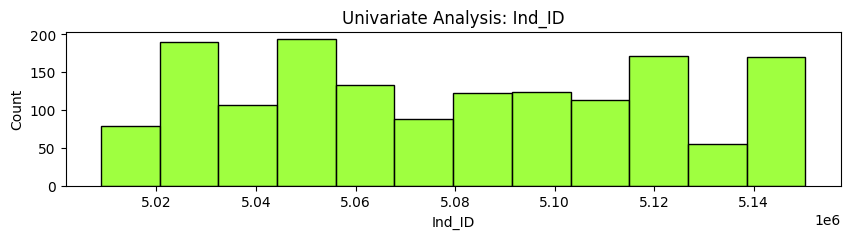

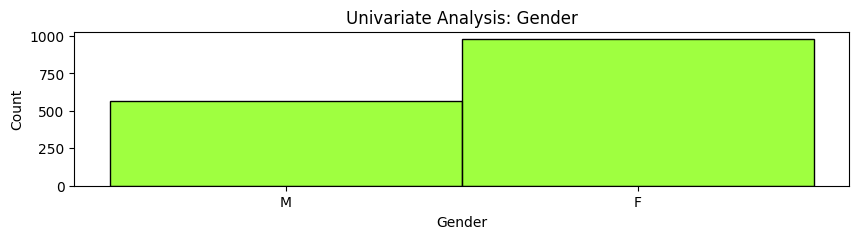

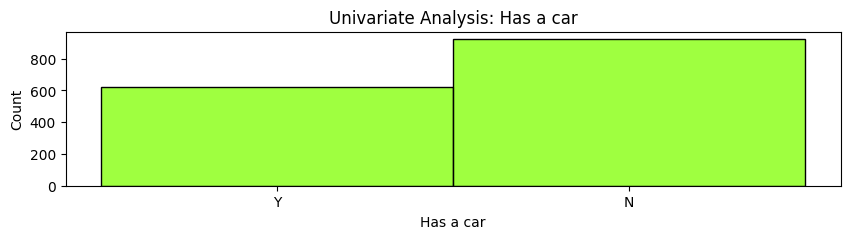

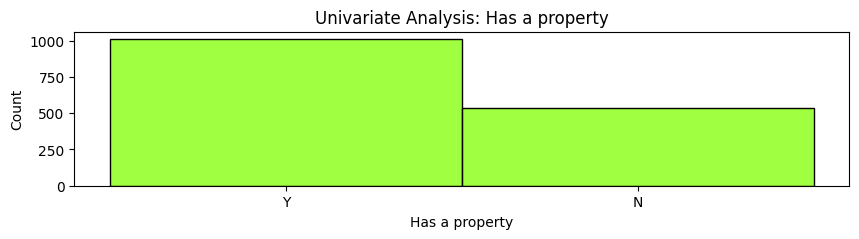

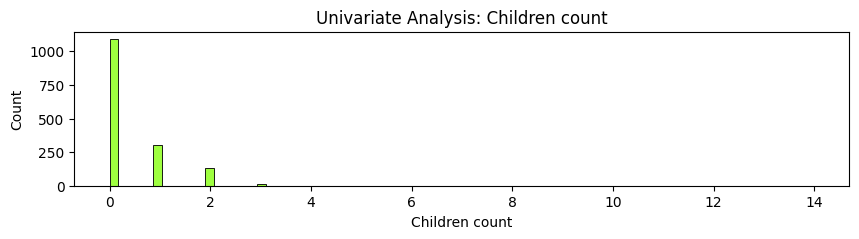

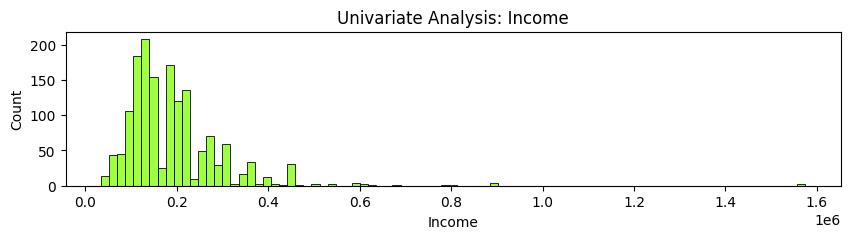

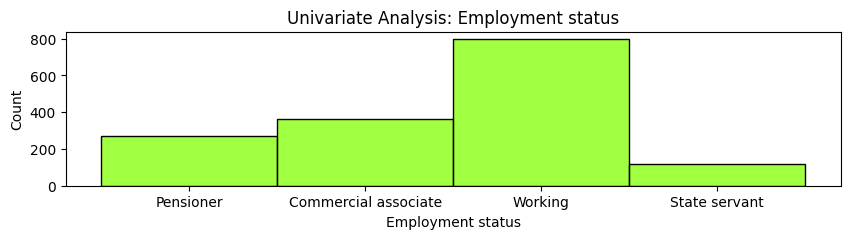

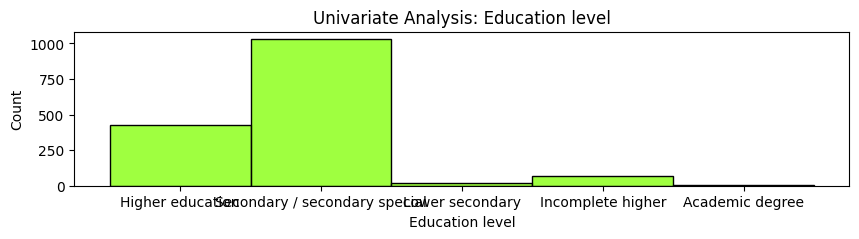

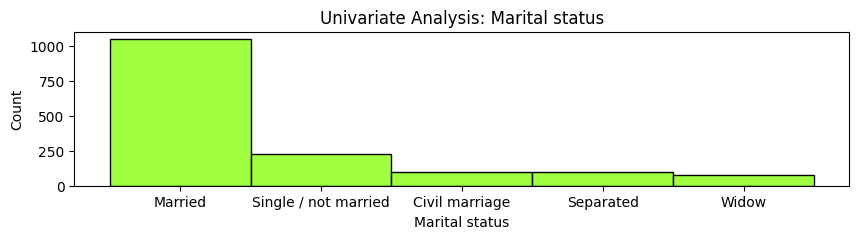

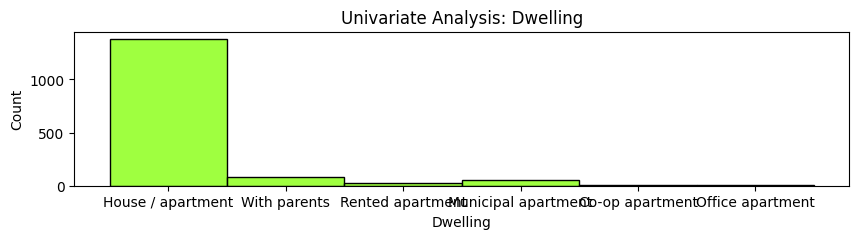

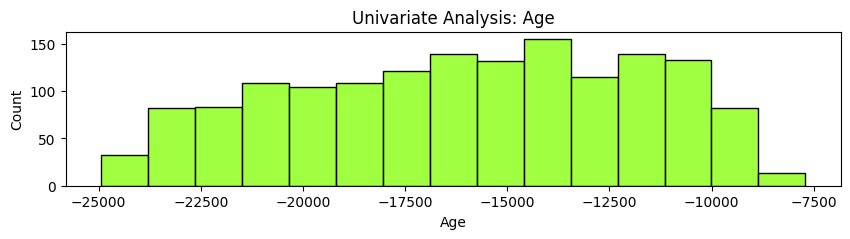

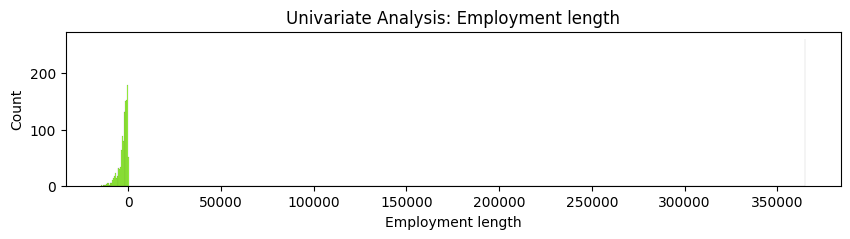

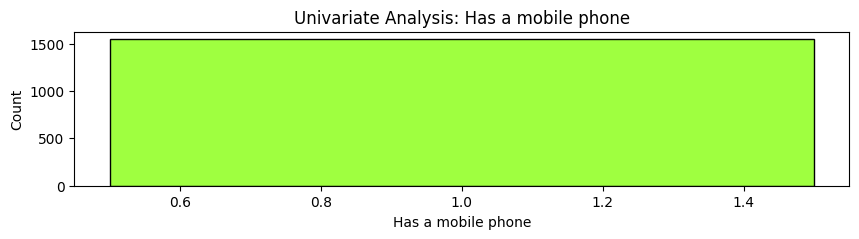

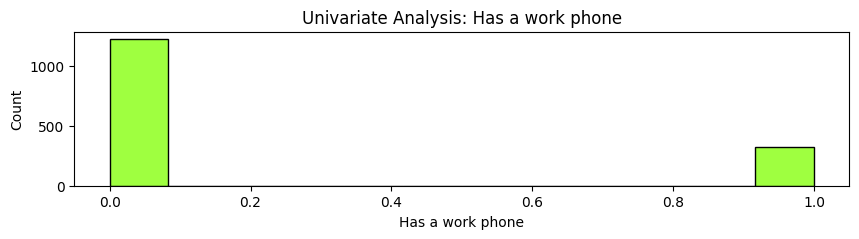

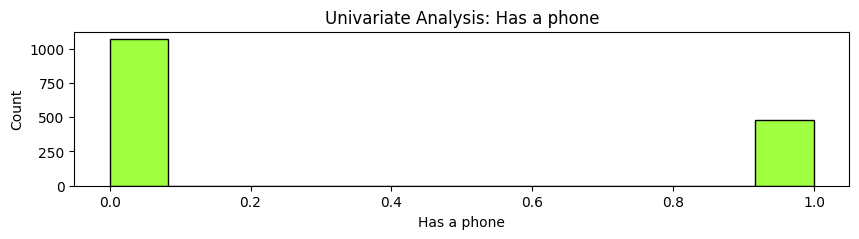

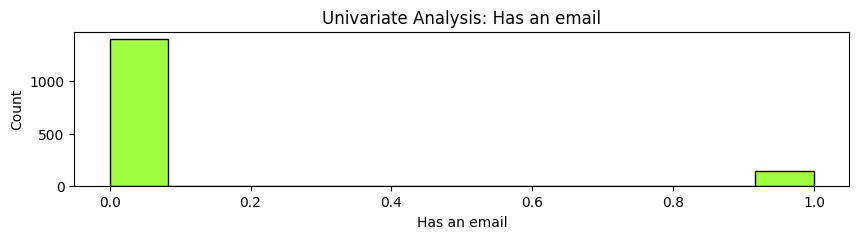

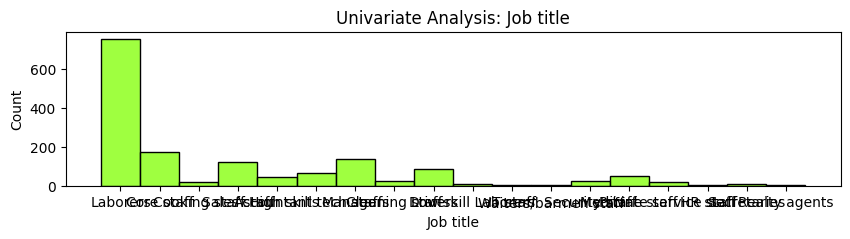

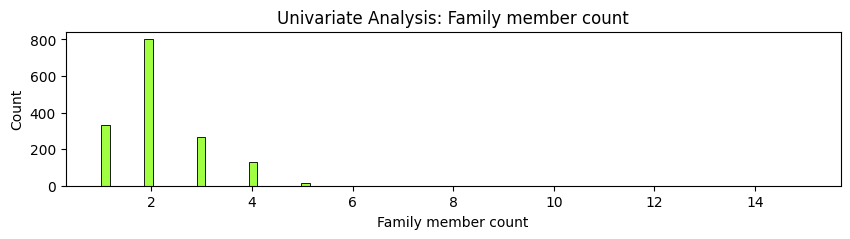

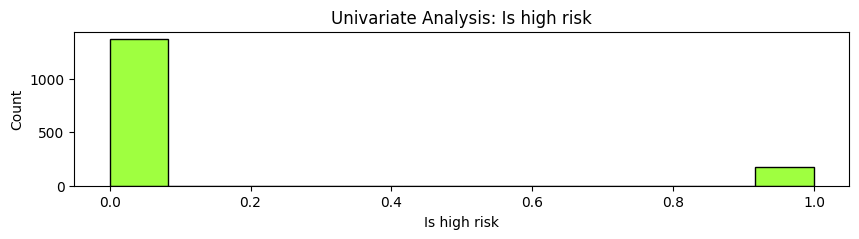

In [53]:
for column in credit_card_merged_data_df.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(credit_card_merged_data_df[column],color='chartreuse')
    plt.title(f'Univariate Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


### Insights:
- 
Most of the applicants are females- .
Most of the applicants do not own car, but they own propert- y.
From the graph it was found that, more than 1000 applicants do not have childr- en.
From the Annual income histogram, the graph is right skewed whcih implies that most of the applicants are present towards right of the peak. The    peak is pointed at approximate value 0- .12.
From the above histogram we can observe most of the applicants source of income is through wor- king.
Most of the applicants education level is secondary/secondary sp- ecial.
Most of the applicants are m- arried.
Most of the applicants own house/apa- rtments.
Birthday count values are normally dis- tributed.
many of the applicants have lesser empl- oyed days.
Each and every applicant has mob- ile phones.
Most of the applicants do not have-  work phone.
Only few of the applicants h- ave email-ID.
Most of the applicants are labourer's - by occupation.
Most of the applicants have 2 members-  in the family.
Most of the applicants credit card is approved.

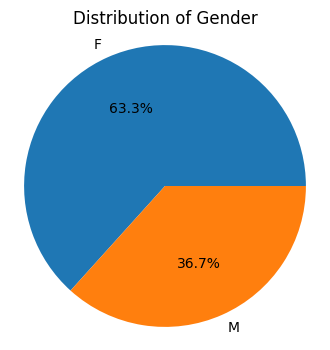

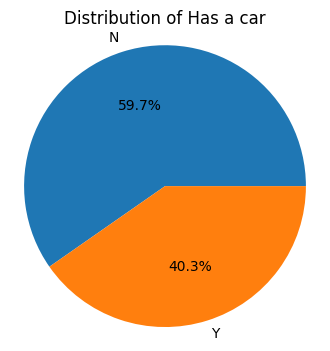

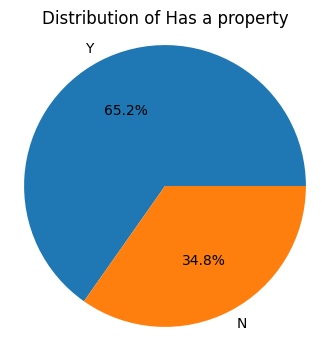

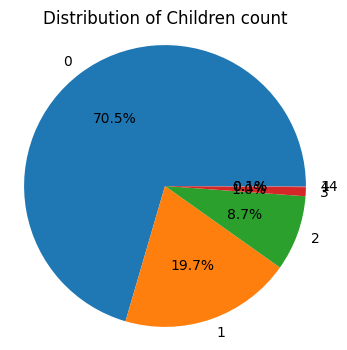

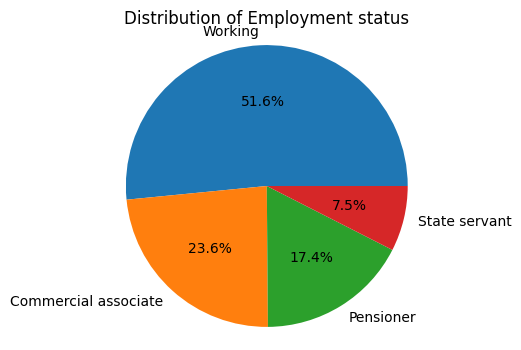

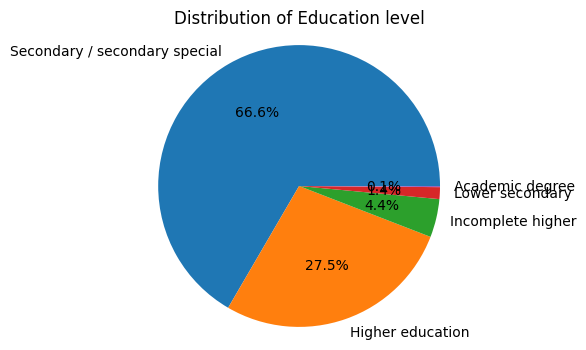

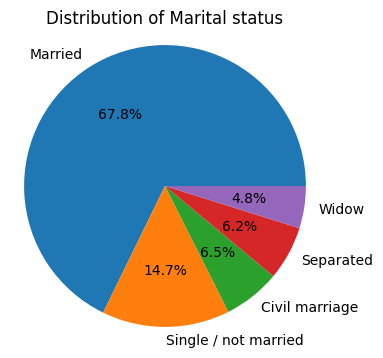

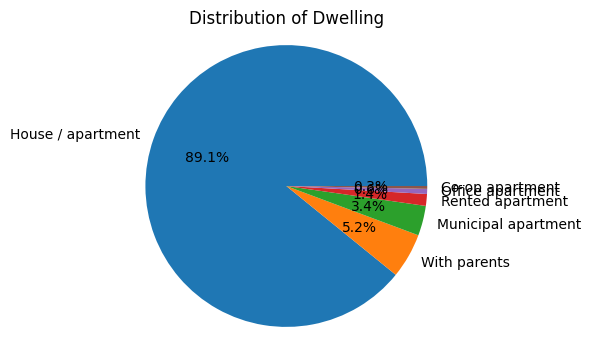

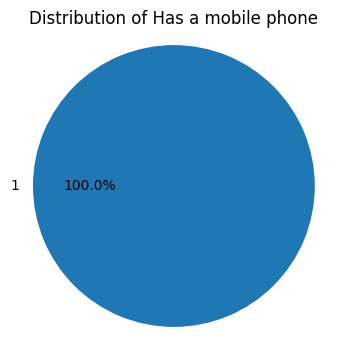

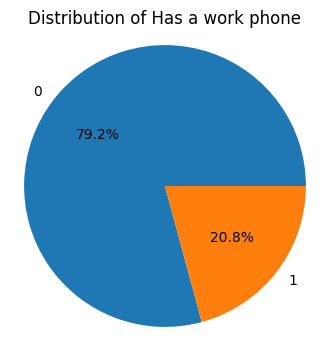

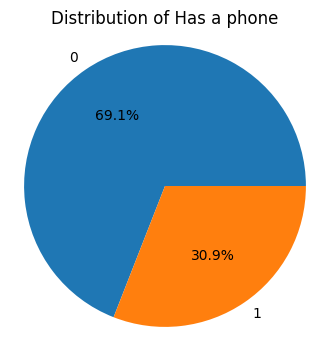

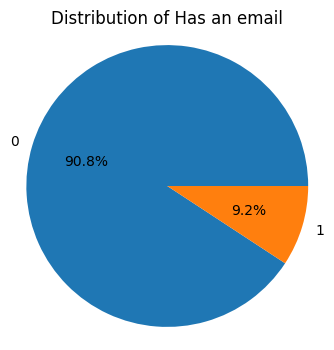

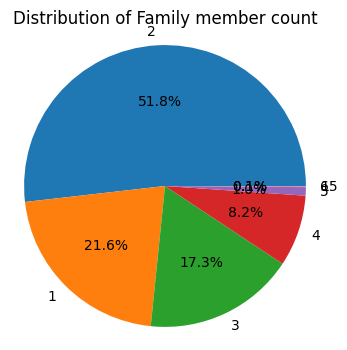

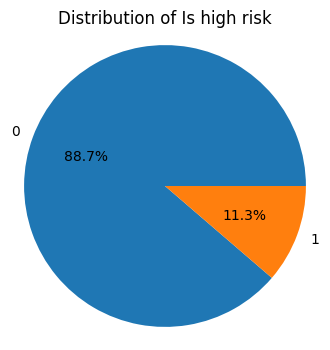

In [57]:
columns = ['Gender','Has a car','Has a property','Children count','Employment status','Education level','Marital status','Dwelling','Has a mobile phone','Has a work phone','Has a phone','Has an email','Family member count','Is high risk']
for column in columns:

    category_counts = credit_card_merged_data_df[column].value_counts()

    plt.figure(figsize=(4, 4))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')
    plt.show()

## Insights:

- 63.3% of the aopplicants are females and 36.7% of the applicants are males.
- 40.3% of the applicants own car, and 59.7% of the applicants do not own car.
- 65.2% of the applicants own property and 34.8% of the applicants do not own property.
- 70.5% of the applicants do not have children.
- Approximately 50% of the applicants source of income is through working.
- Approximately 10% of the applicants do not own House/apartment.

### Bivariate Analysis

- Correlation
- Scatter plot
- Pair plot

### 2.4.1 Numerical vs numerical features (Correlation & scatter plots)#### 
2.4.1.1 Scatter plots

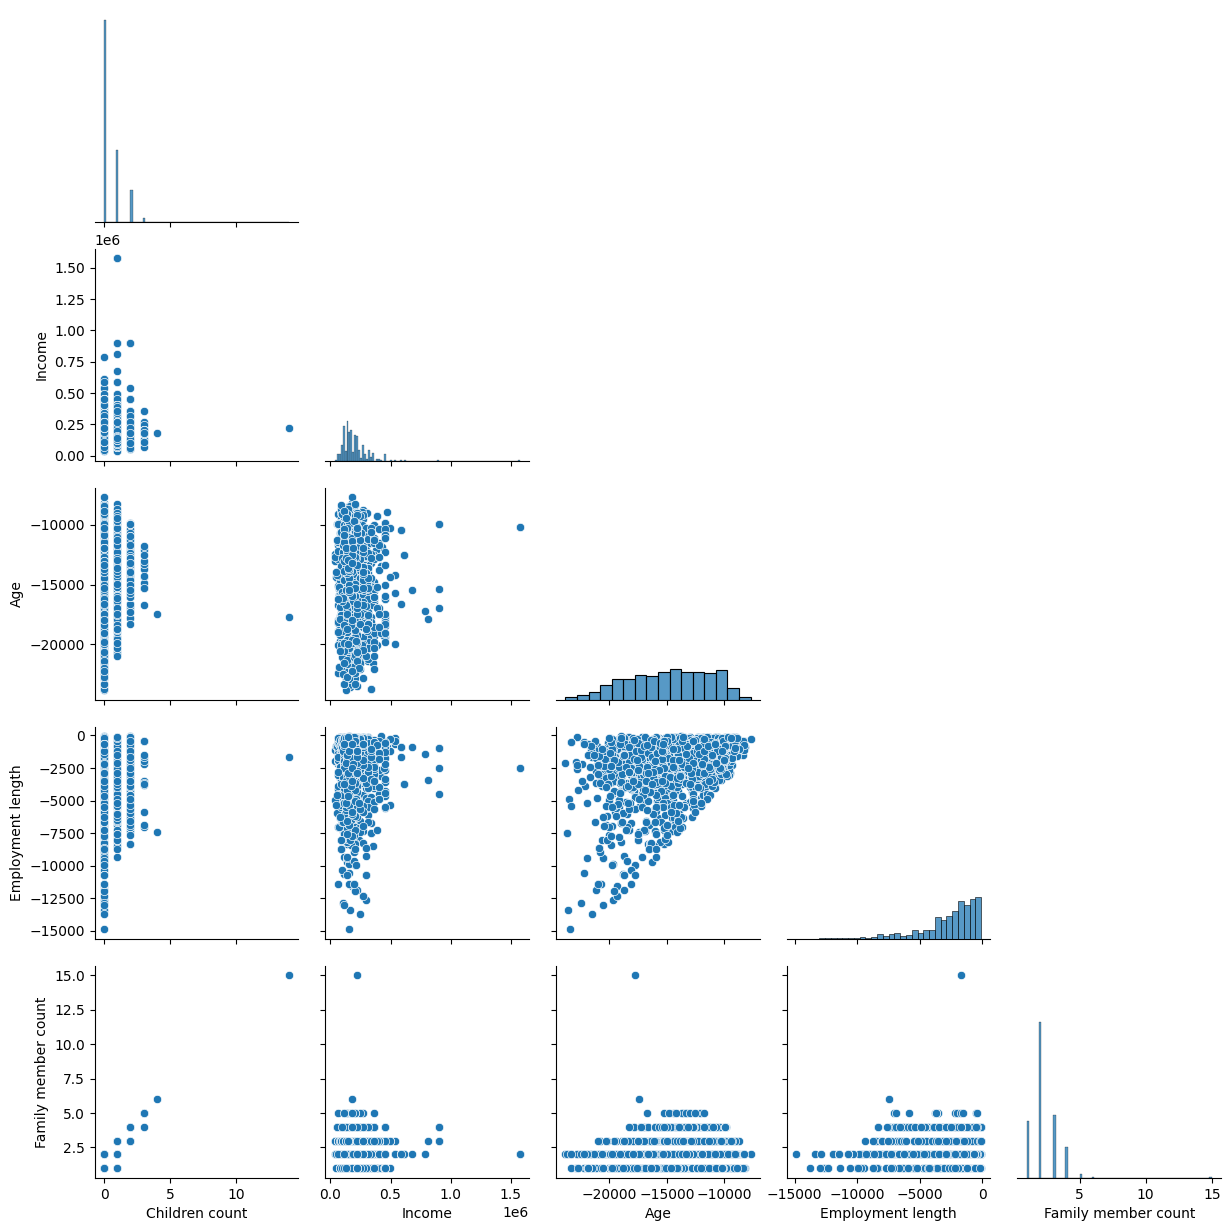

In [34]:
sns.pairplot(credit_card_merged_data_df[credit_card_merged_data_df['Employment length'] < 0].drop(['Ind_ID','Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email','Is high risk'],axis=1),corner=True)
plt.show()

### Interpretation:

We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
Another interesting trend is the Employment length and age. This also makes sense, the longer the employee has been working, the older they are.

#### 2.4.1.1.1 Family member count vs children count (numerical vs numerical feature comparison)

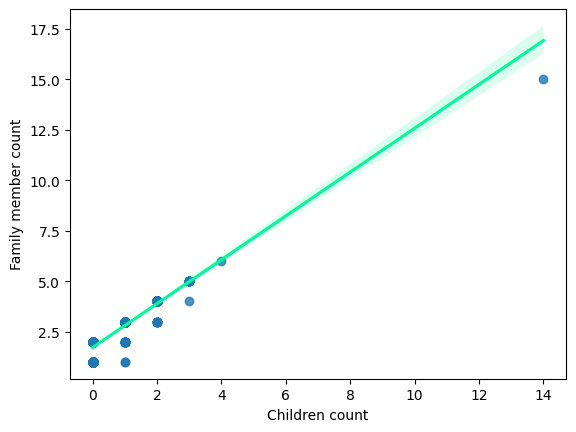

In [35]:
sns.regplot(x='Children count',y='Family member count',data=credit_card_merged_data_df,line_kws={'color': 'mediumspringgreen'})
plt.show()

#### 2.4.1.1.2 Employment length vs age (numerical vs numerical feature comparison)

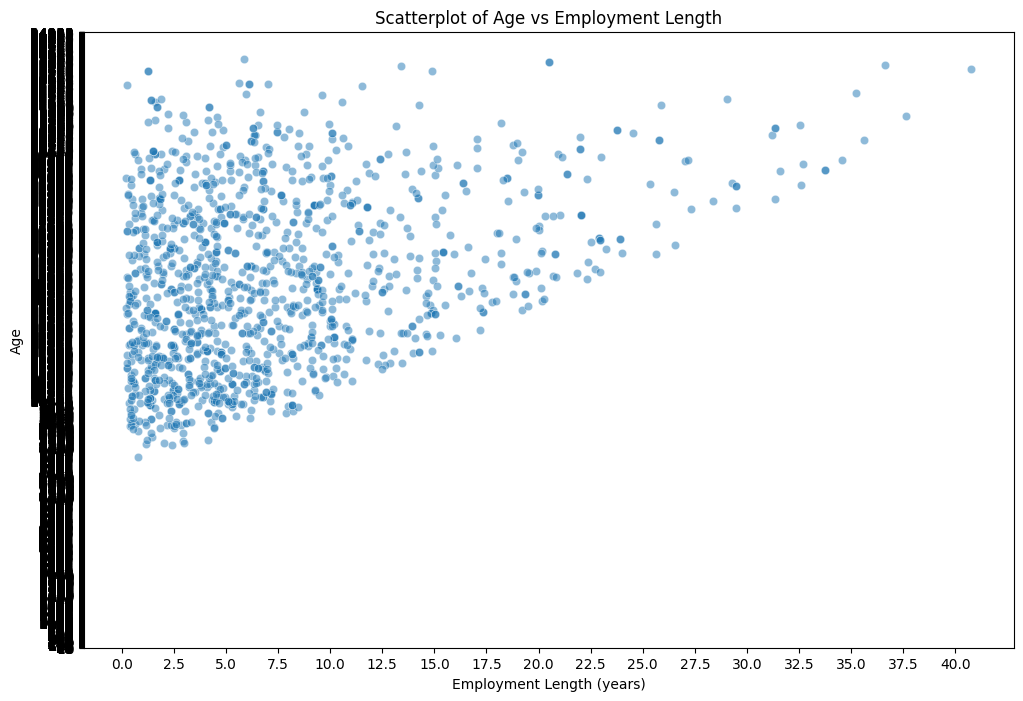

In [41]:
x_employ_length = np.abs(credit_card_merged_data_df[credit_card_merged_data_df['Employment length'] < 0]['Employment length'])/365.25
y_age=np.abs(credit_card_merged_data_df['Age'])
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=x_employ_length, y=y_age, alpha=0.5)
# change the frequency of the x-axis and y-axis labels
plt.xticks(np.arange(0, x_employ_length.max(), 2.5))
plt.yticks(np.arange(0, y_age.max(), 5))
plt.xlabel('Employment Length (years)')
plt.ylabel('Age')
plt.title('Scatterplot of Age vs Employment Length')
plt.show()

### Interpretation:

This scatterplot shows that the age of the applicants is correlated with the length of the employment.
The reason why it is shaped like a reversed triangle, it is because the age of the applicants increase with the length of the employment. You can't have an employment length > than the age.

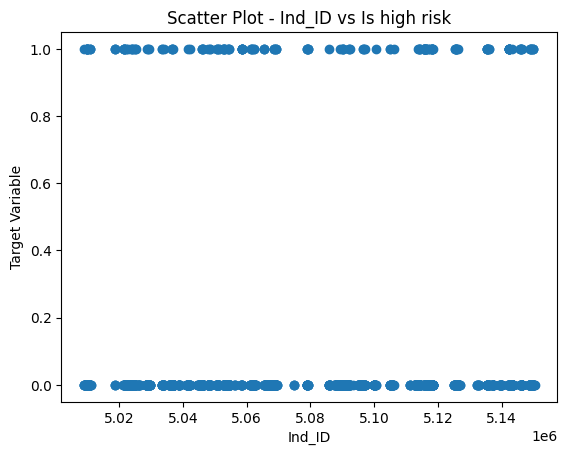

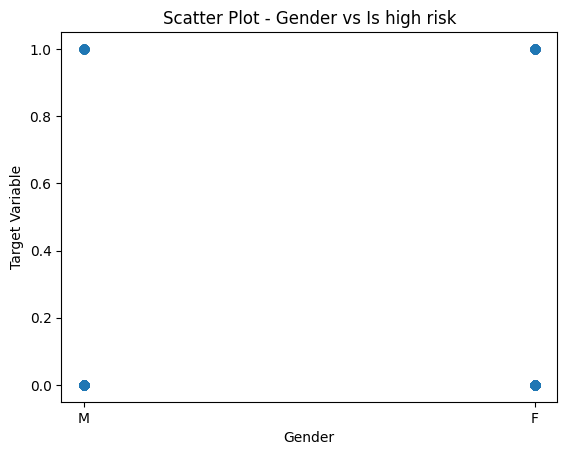

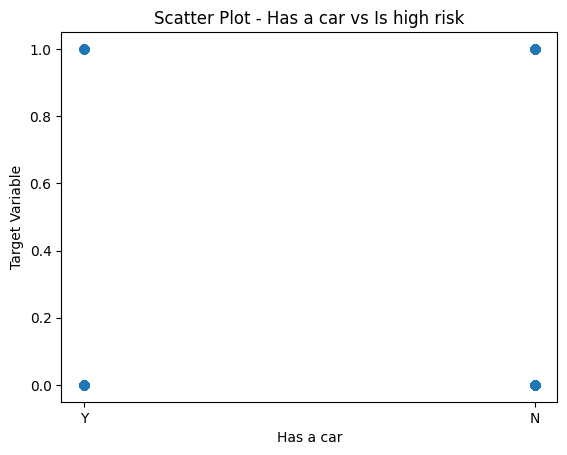

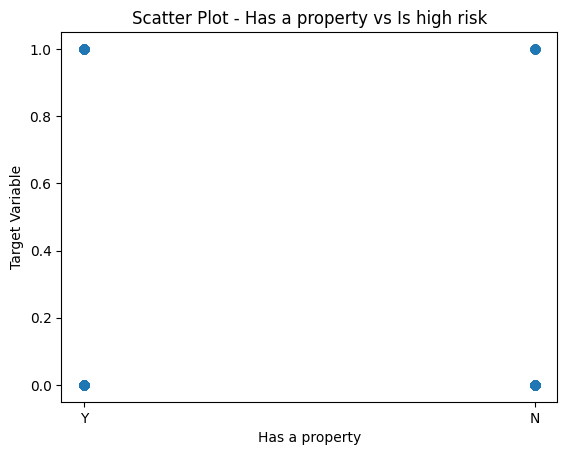

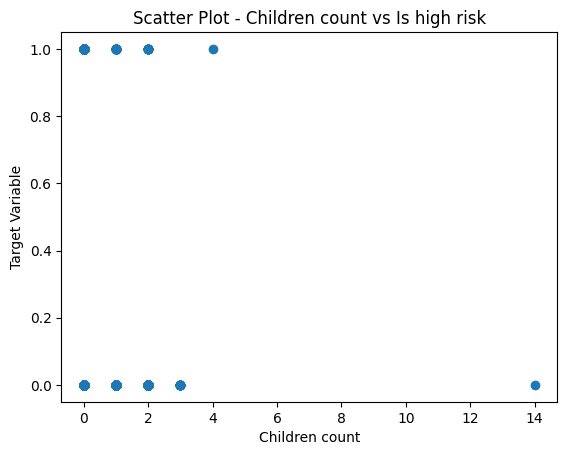

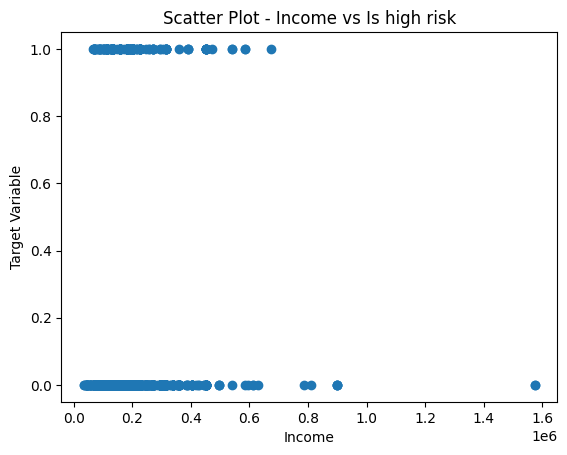

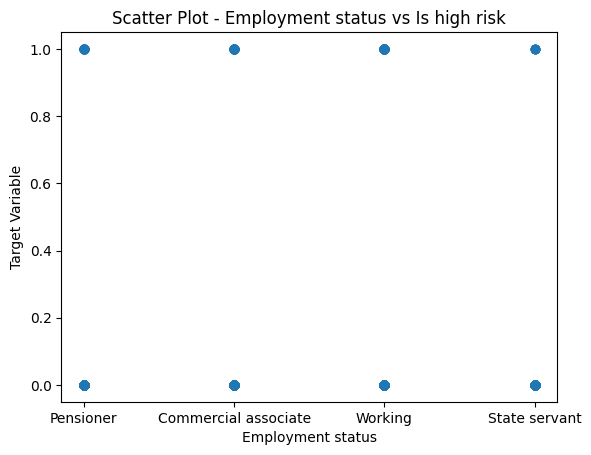

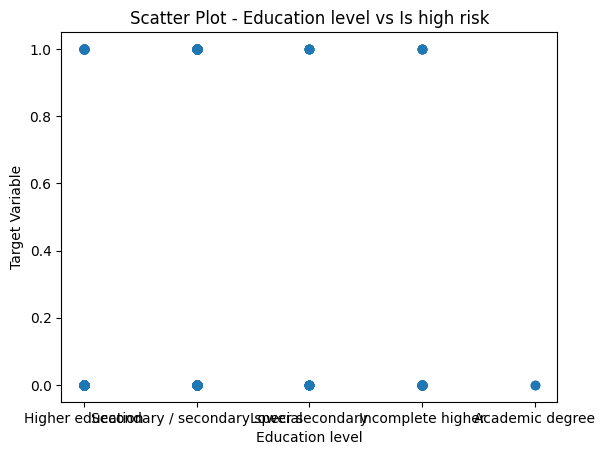

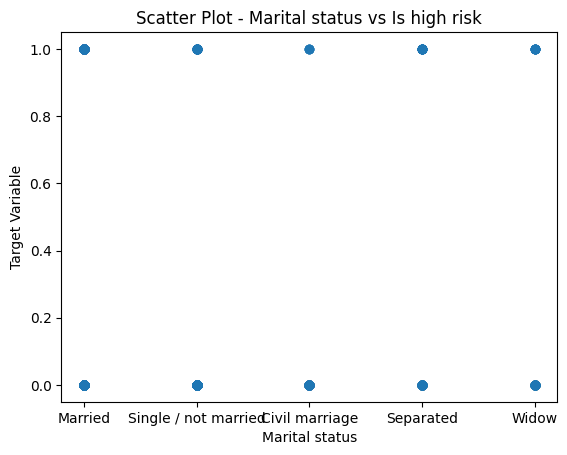

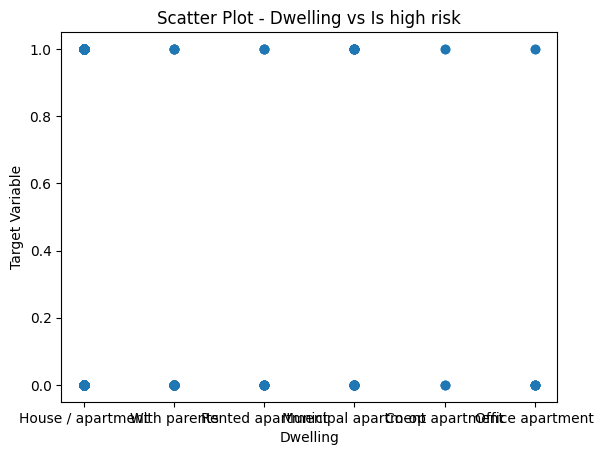

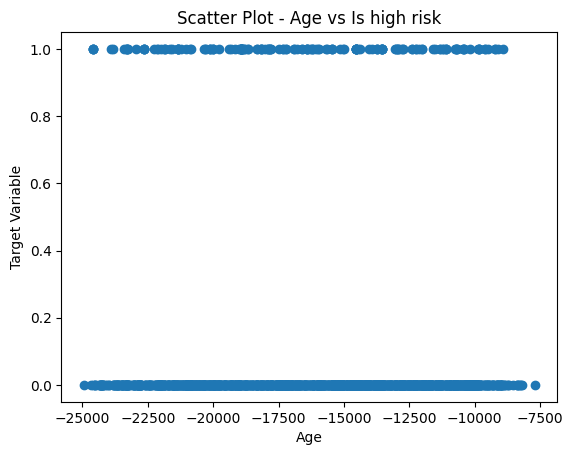

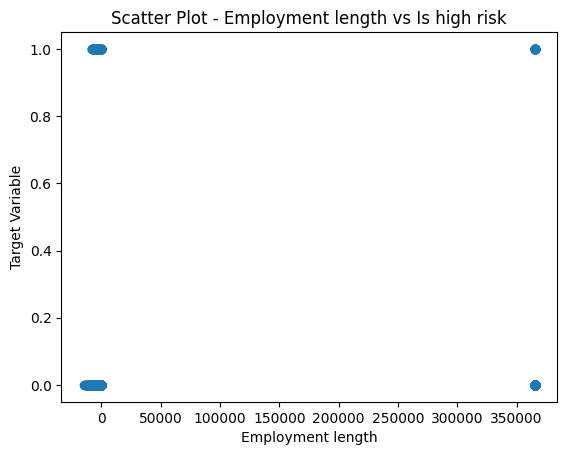

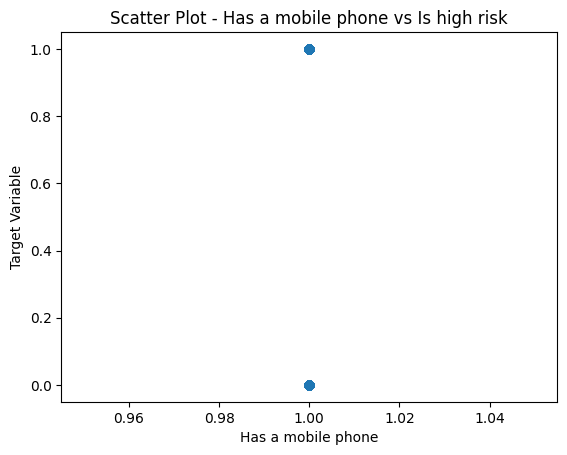

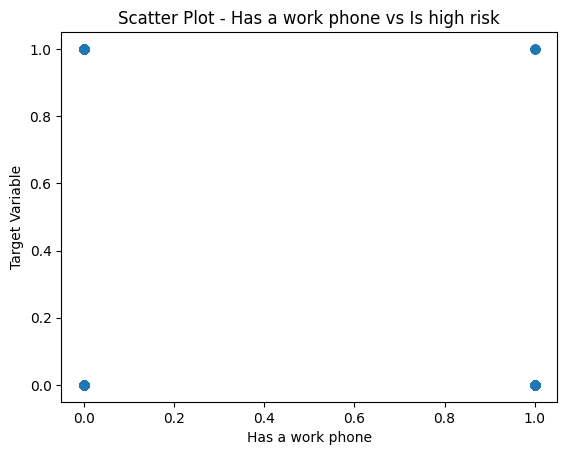

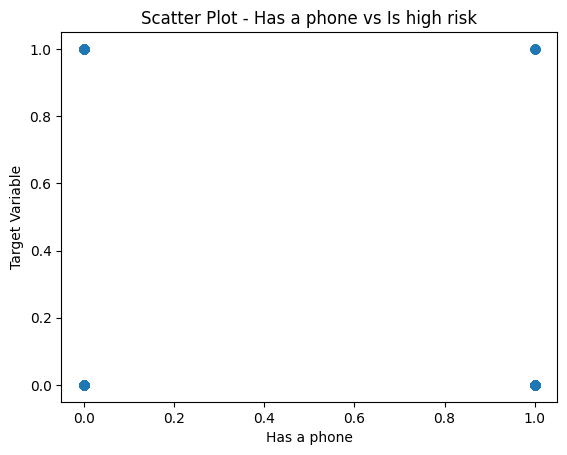

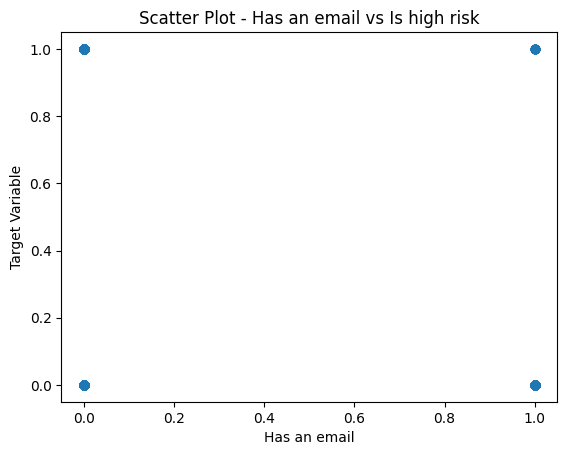

TypeError: 'value' must be an instance of str or bytes, not a float

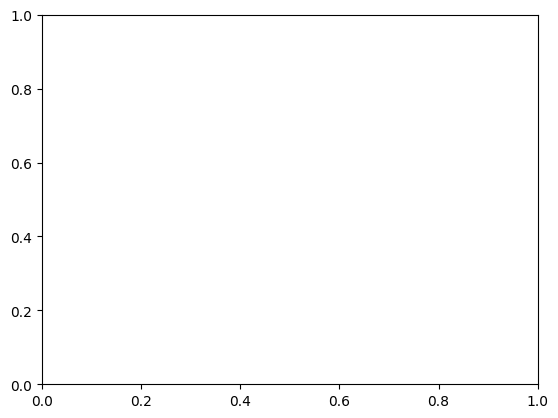

In [46]:
target=['Is high risk']
for column in credit_card_merged_data_df.columns:
    # Create a scatter plot between the target variable and the current column

    plt.figure()
    plt.scatter(credit_card_merged_data_df[column], credit_card_merged_data_df['Is high risk'])
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot - {column} vs Is high risk')
    plt.show()
     

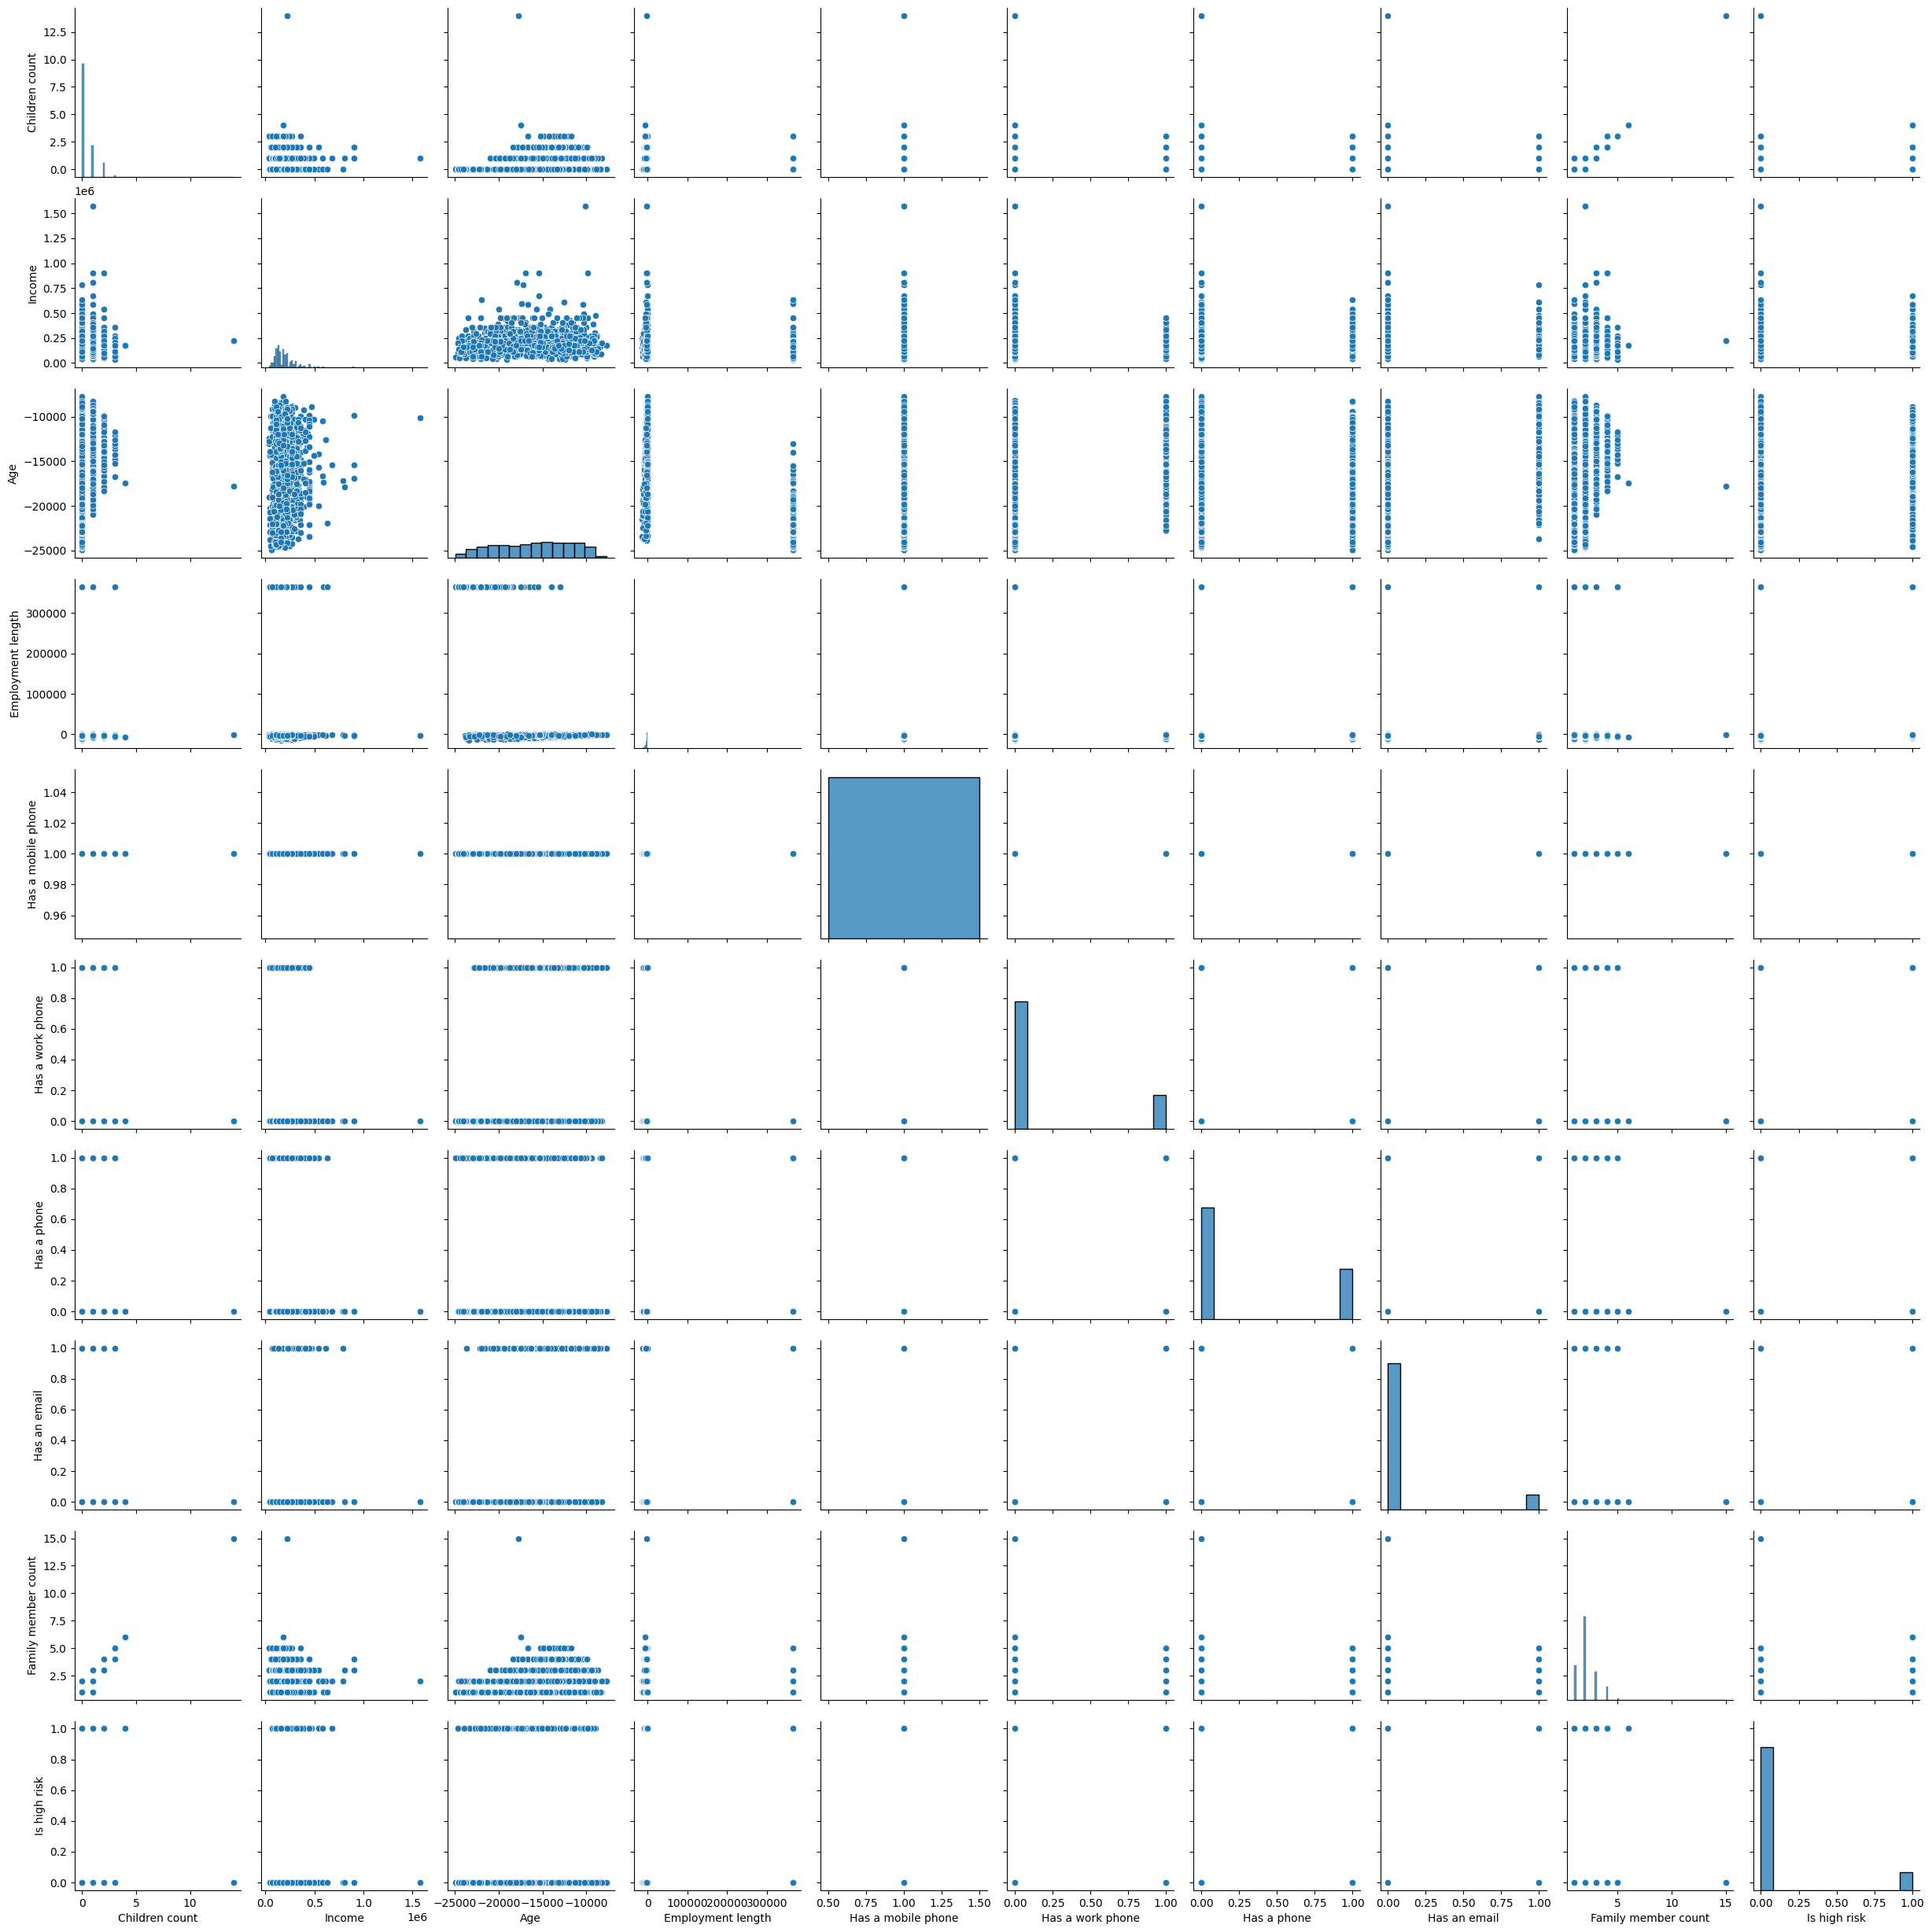

In [47]:
columns = ['Gender','Has a car','Has a property','Children count','Income','Employment status','Education level','Marital status','Dwelling','Age','Employment length','Has a mobile phone','Has a work phone','Has a phone','Has an email','Job title','Family member count','Is high risk']
sns.pairplot(credit_card_merged_data_df[columns])

Feature Engineering
Imputation
Changing the categorical variables into numerical columns.

### Label encoding :-

'Gender','Has a car','Has a property','Income','Education level','Marital status','Dwelling','Job title']

In [61]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender','Has a car','Has a property','Income','Education level','Marital status','Dwelling','Job title','Employment status']

encoder = LabelEncoder()

for column in columns:
    if column in credit_card_merged_data_df.columns:
        credit_card_merged_data_df[column] = encoder.fit_transform(credit_card_merged_data_df[column])
print(credit_card_merged_data_df)
     

       Ind_ID  Gender  Has a car  Has a property  Children count  Income  \
0     5008827       1          1               1               0      60   
1     5009744       0          1               0               0      89   
2     5009746       0          1               0               0      89   
3     5009749       0          1               0               0      64   
4     5009752       0          1               0               0      89   
...       ...     ...        ...             ...             ...     ...   
1543  5028645       0          0               1               0      64   
1544  5023655       0          0               0               0      73   
1545  5115992       1          1               1               2      60   
1546  5118219       1          1               0               0      82   
1547  5053790       0          1               1               0      73   

      Employment status  Education level  Marital status  Dwelling      Age  \
0       

In [62]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable named 'data'
# where 'data' is a 2D array or pandas DataFrame

# Extract the target variable column
target_variable = credit_card_merged_data_df['Is high risk']

# Remove the target variable column from the dataset
features = credit_card_merged_data_df.drop('Is high risk', axis=1)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Apply standard scaling to the features
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame or array combining the scaled features and target variable
credit_card_merged_data_df = pd.DataFrame(scaled_features, columns=features.columns)
credit_card_merged_data_df['Is high risk'] = target_variable

### Test/Train Split

In [75]:
from sklearn.model_selection import train_test_split

X = credit_card_merged_data_df[['Gender','Has a car','Has a property','Children count','Income','Employment status','Education level','Marital status','Dwelling','Age','Employment length','Has a mobile phone','Has a work phone','Has a phone','Has an email','Job title','Family member count',]]
y = credit_card_merged_data_df['Is high risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
X_train

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count
730,-0.761309,-0.821781,0.729845,-0.531645,-0.470410,0.888906,0.691398,0.576153,-0.301490,0.302816,-0.440463,0.0,-0.512487,-0.669390,-0.319029,1.197544,-1.225901
100,1.313527,-0.821781,-1.370155,0.756284,-1.413889,0.102156,0.691398,-0.444310,0.737946,0.242742,-0.480756,0.0,-0.512487,-0.669390,-0.319029,-1.321659,0.884994
619,-0.761309,-0.821781,-1.370155,0.756284,-1.413889,0.888906,0.691398,-1.464773,-0.301490,1.377290,-0.437450,0.0,1.951270,-0.669390,-0.319029,-1.825500,0.884994
838,1.313527,-0.821781,-1.370155,-0.531645,-1.799858,0.102156,0.691398,-0.444310,-0.301490,1.037422,-0.451373,0.0,-0.512487,-0.669390,-0.319029,-0.481925,-0.170453
1419,-0.761309,-0.821781,-1.370155,-0.531645,-1.027921,-0.684595,0.691398,0.576153,0.737946,-1.321784,2.220314,0.0,-0.512487,-0.669390,-0.319029,1.197544,-1.225901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-0.761309,-0.821781,-1.370155,-0.531645,1.373664,-1.471346,-1.533725,-0.444310,-0.301490,-0.034923,-0.433160,0.0,1.951270,1.493899,3.134513,0.525756,-0.170453
1294,1.313527,1.216869,0.729845,0.756284,0.473070,0.888906,0.691398,-0.444310,-0.301490,1.377053,-0.433189,0.0,1.951270,-0.669390,-0.319029,1.197544,0.884994
860,1.313527,1.216869,-1.370155,2.044213,-1.027921,0.888906,0.691398,-0.444310,-0.301490,0.696608,-0.432492,0.0,-0.512487,1.493899,-0.319029,-0.481925,1.940442
1459,-0.761309,-0.821781,0.729845,-0.531645,0.001330,0.888906,-1.533725,-0.444310,-0.301490,-0.545789,-0.458885,0.0,-0.512487,-0.669390,-0.319029,-0.817819,-0.170453


In [76]:
y_train

730     0
100     1
619     0
838     0
1419    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Is high risk, Length: 1083, dtype: int64

In [77]:
X_test

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count
30,-0.761309,-0.821781,0.729845,-0.531645,-1.371004,0.888906,-0.050310,1.596616,2.816818,0.949440,-0.465542,0.0,-0.512487,-0.669390,-0.319029,-1.657553,-0.170453
1514,-0.761309,-0.821781,-1.370155,-0.531645,-1.714087,-0.684595,0.691398,2.617078,0.737946,-1.406219,2.220314,0.0,-0.512487,1.493899,-0.319029,1.197544,-1.225901
1182,-0.761309,-0.821781,-1.370155,2.044213,-1.499660,0.888906,-0.050310,1.596616,-0.301490,0.157834,-0.447852,0.0,-0.512487,-0.669390,-0.319029,0.525756,0.884994
1205,-0.761309,-0.821781,0.729845,-0.531645,-1.027921,-0.684595,0.691398,2.617078,-0.301490,-1.650299,2.220314,0.0,-0.512487,-0.669390,-0.319029,1.197544,-1.225901
528,1.313527,-0.821781,0.729845,-0.531645,0.687497,0.888906,0.691398,-1.464773,-0.301490,1.293801,-0.439446,0.0,-0.512487,-0.669390,-0.319029,-0.146031,-0.170453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1.313527,-0.821781,0.729845,-0.531645,-0.213097,0.888906,0.691398,1.596616,-0.301490,1.807978,-0.441871,0.0,1.951270,1.493899,-0.319029,-1.321659,-1.225901
978,-0.761309,1.216869,0.729845,-0.531645,0.644611,0.888906,0.691398,-0.444310,-0.301490,-1.224105,-0.457347,0.0,-0.512487,-0.669390,-0.319029,-0.146031,-0.170453
892,-0.761309,-0.821781,-1.370155,-0.531645,-0.470410,-0.684595,-1.533725,-0.444310,0.737946,-0.865553,2.220314,0.0,-0.512487,-0.669390,-0.319029,1.197544,-0.170453
109,1.313527,-0.821781,-1.370155,-0.531645,0.687497,0.888906,0.691398,2.617078,0.737946,-0.796018,-0.433429,0.0,-0.512487,-0.669390,-0.319029,0.861650,-1.225901


In [78]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
312     0
978     0
892     0
109     1
952     0
Name: Is high risk, Length: 465, dtype: int64

### Machine Learning

#### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
# Create an instance of the LogisticRegression class
logistic_model = LogisticRegression()

# Train the logistic regression model on the training data
logistic_model.fit(X_train, y_train)
     

LogisticRegression()

#### KNN Algorithm

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
     

In [85]:
# Create an instance of the KNeighborsClassifier class
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
     

In [87]:
# Create an instance of the DecisionTreeClassifier class
tree_model = DecisionTreeClassifier()

# Train the decision tree model on the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest Algorithm

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
     


In [89]:
# Create an instance of the RandomForestClassifier class
forest_model = RandomForestClassifier()

# Train the random forest model on the training data
forest_model.fit(X_train, y_train)

RandomForestClassifier()

### SVM Algorithm

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
# Create an instance of the SVC class
svm_model = SVC()

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)
     

SVC()

## Prediction

#### Logistic Regression

In [93]:
lr_pred = logistic_model.predict(X_test)
     

#### KNN

In [94]:
knn_pred = knn_model.predict(X_test)

#### Decission Tree

In [111]:
dt_pred = tree_model.predict(X_test)
     

#### Random Forest

In [112]:
rf_pred = forest_model.predict(X_test)
     

#### SVM

In [113]:
svm_pred = svm_model.predict(X_test)

## Evaluating the Prediction
### Logistic Regression

In [ ]:
Logistic Regression

In [95]:
accuracy_lr = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy_lr)

Accuracy: 0.9075268817204301


In [96]:
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [97]:
lr_precision = precision_score(y_test, lr_pred,zero_division=0)
print("Precision Score",lr_precision)

Precision Score 0.0


In [98]:
lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Score Of Confusion Matrix",lr_confusion_matrix)

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [99]:
lr_classification_report = classification_report(y_test, lr_pred,zero_division=0)
print("Score Of Classification report",lr_classification_report)
     

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



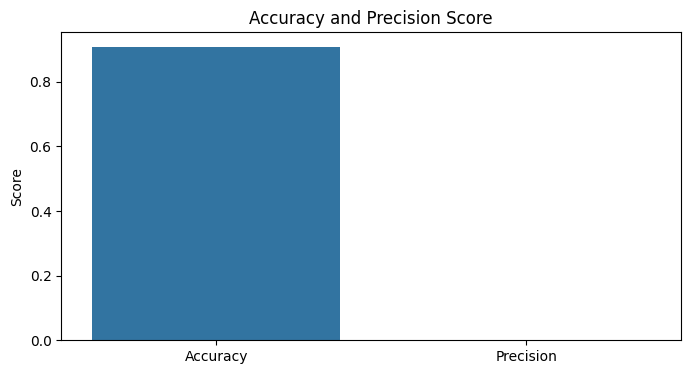

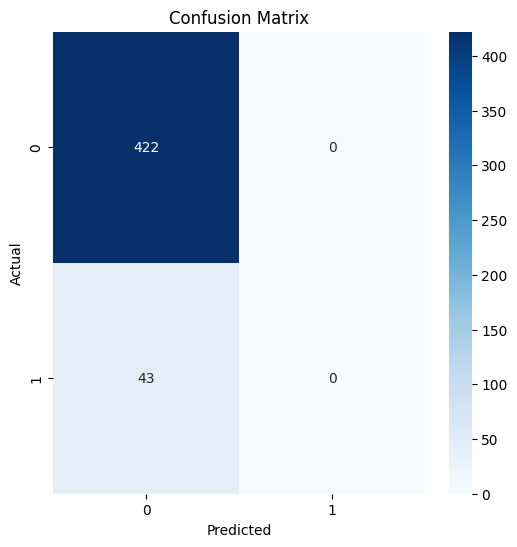

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [103]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_lr, 'Precision': lr_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(lr_classification_report)

### KNN

In [104]:
accuracy_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.8989247311827957


In [108]:
knn_precision = precision_score(y_test, knn_pred,zero_division=0)
print("Precision Score",knn_precision)

Precision Score 0.3


In [105]:
knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Score Of Confusion Matrix",knn_confusion_matrix)

Score Of Confusion Matrix [[415   7]
 [ 40   3]]


In [106]:
knn_classification_report = classification_report(y_test, knn_pred,zero_division=0)
print("Score Of Classification report",knn_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      0.98      0.95       422
           1       0.30      0.07      0.11        43

    accuracy                           0.90       465
   macro avg       0.61      0.53      0.53       465
weighted avg       0.86      0.90      0.87       465



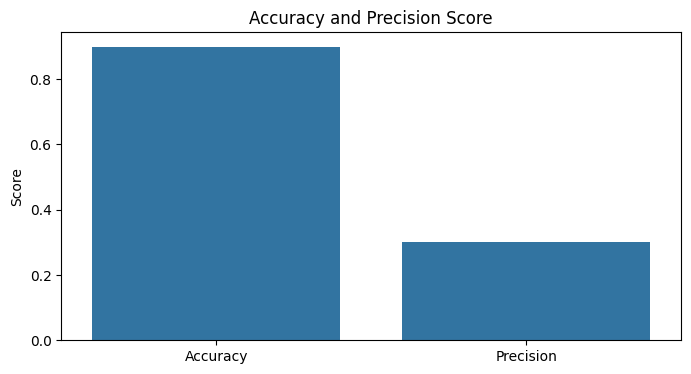

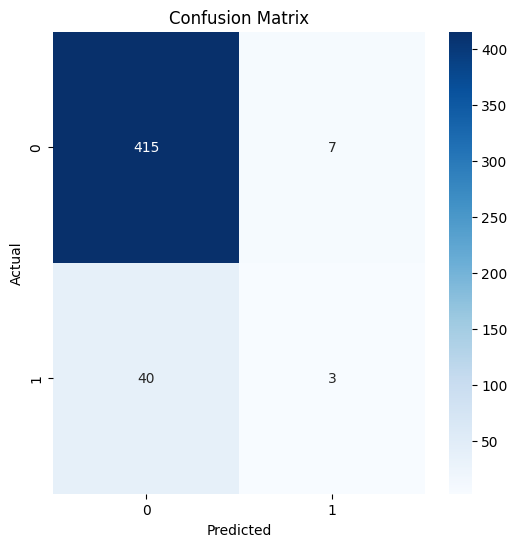

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       422
           1       0.30      0.07      0.11        43

    accuracy                           0.90       465
   macro avg       0.61      0.53      0.53       465
weighted avg       0.86      0.90      0.87       465



In [109]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_knn, 'Precision': knn_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(knn_classification_report)
     

### Decision Tree

In [114]:
accuracy_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy_dt)
     

Accuracy: 0.886021505376344


In [115]:
dt_precision = precision_score(y_test, dt_pred,zero_division=0)
print("Precision Score",dt_precision)

Precision Score 0.4


In [116]:
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("Score Of Confusion Matrix",dt_confusion_matrix)
     

Score Of Confusion Matrix [[392  30]
 [ 23  20]]


In [117]:
dt_classification_report = classification_report(y_test, dt_pred,zero_division=0)
print("Score Of Classification report",dt_classification_report)
     

Score Of Classification report               precision    recall  f1-score   support

           0       0.94      0.93      0.94       422
           1       0.40      0.47      0.43        43

    accuracy                           0.89       465
   macro avg       0.67      0.70      0.68       465
weighted avg       0.89      0.89      0.89       465



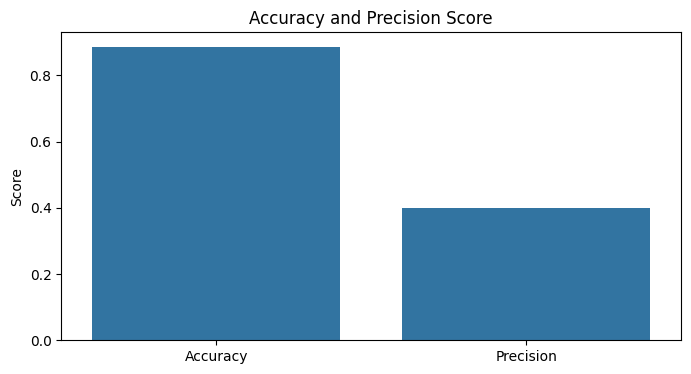

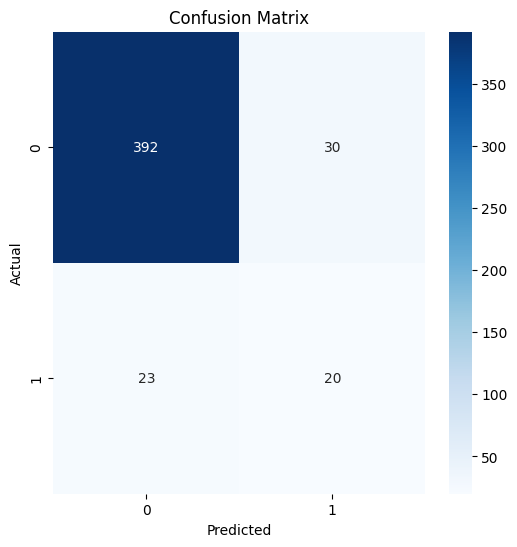

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       422
           1       0.40      0.47      0.43        43

    accuracy                           0.89       465
   macro avg       0.67      0.70      0.68       465
weighted avg       0.89      0.89      0.89       465



In [118]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_dt, 'Precision': dt_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(dt_classification_report)
     

### Random Forest

In [119]:
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy_rf)
     

Accuracy: 0.9440860215053763


In [120]:
rf_precision = precision_score(y_test, rf_pred,zero_division=0)
print("Precision Score",rf_precision)
     

Precision Score 0.8695652173913043


In [121]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred)
print("Score Of Confusion Matrix",rf_confusion_matrix)

Score Of Confusion Matrix [[419   3]
 [ 23  20]]


In [122]:
rf_classification_report = classification_report(y_test, rf_pred,zero_division=0)
print("Score Of Classification report",rf_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.95      0.99      0.97       422
           1       0.87      0.47      0.61        43

    accuracy                           0.94       465
   macro avg       0.91      0.73      0.79       465
weighted avg       0.94      0.94      0.94       465



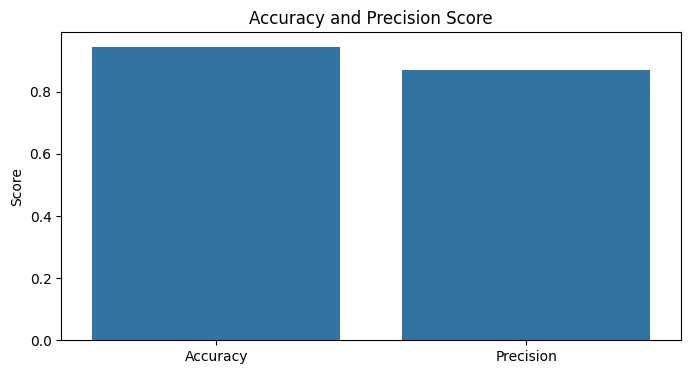

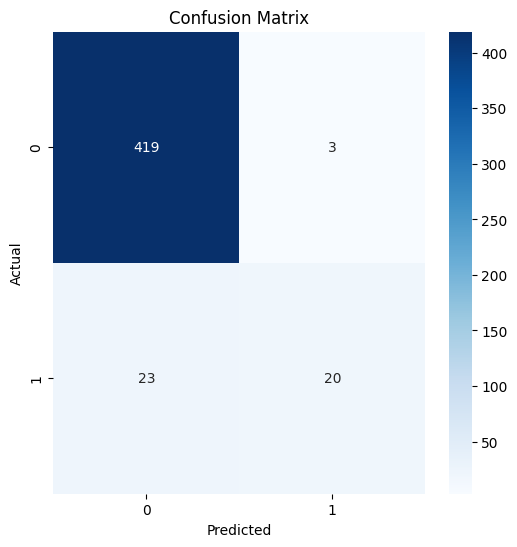

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       422
           1       0.87      0.47      0.61        43

    accuracy                           0.94       465
   macro avg       0.91      0.73      0.79       465
weighted avg       0.94      0.94      0.94       465



In [123]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_rf, 'Precision': rf_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(rf_classification_report)
     


### SVM

In [124]:
accuracy_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy_svm)
     

Accuracy: 0.9075268817204301


In [125]:
svm_precision = precision_score(y_test, svm_pred,zero_division=0)
print("Precision Score",svm_precision)

Precision Score 0.0


In [126]:
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
print("Score Of Confusion Matrix",svm_confusion_matrix)
     

Score Of Confusion Matrix [[422   0]
 [ 43   0]]


In [127]:
svm_classification_report = classification_report(y_test, svm_pred,zero_division=0)
print("Score Of Classification report",svm_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



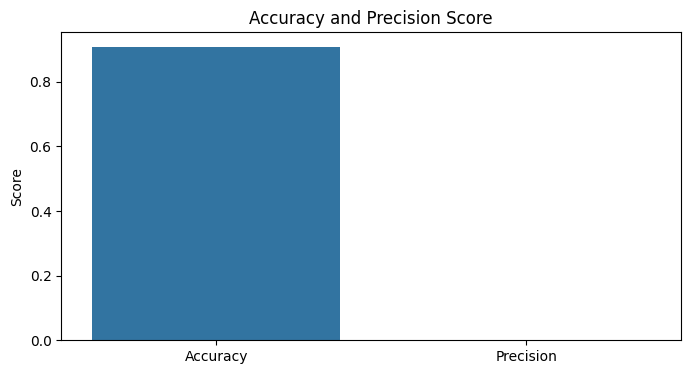

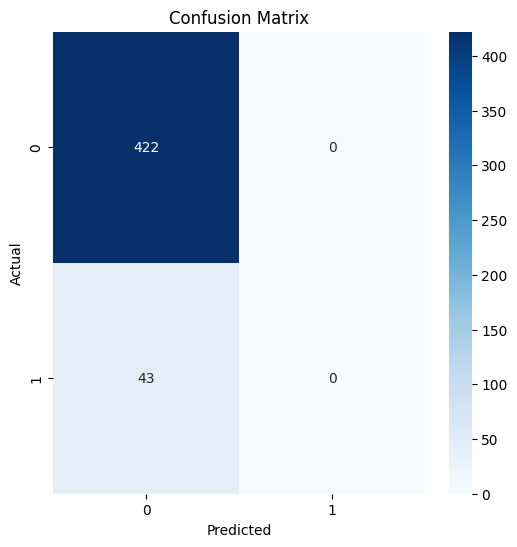

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



In [128]:
plt.figure(figsize=(8, 4))
scores = {'Accuracy': accuracy_svm, 'Precision': svm_precision}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(svm_classification_report)
     


### Conclusion

Based on the evaluation, we can conclude that **Random forest** is the best algorithm to use for this dataset.